## Stock Analysis & Portfolio Management - Capital Asset Pricing Model (CAPM)

## Submitted By: Haritha Mundra and Rajeev Punjabi

You are provided with the following information for 12 stocks of leading companies listed in New York Stock Exchange(NYSE):

Date
Open price: Price of stock at the start of the day
Close price: Price of stock at the end of the day
High price: Highest price reached by the stock on that day
Low price: Lowest price reached by the stock on that day
Adjusted close price: Stock price adjusted to include the annual returns (dividends) that the company offers to the shareholders
Volume traded: Number of stocks traded on the day

The information for every stock ranges from 1st October 2010 to 30th September 2020.

The stocks belong to different domains:
-Technology/IT
-Travel/Aviation/Hospitality
-Banking/Financial Services and Insurance
-Pharmaceuticals/Healthcare/Life Sciences

To help you with the market benchmark, you are given the S&P 500 index prices for the same period.

### Objective:

Creating a Portfolio for the Investor (Ms Alexandra Kolishnyick (aka Alexa)).
Analyising the different sectors with comparision to Index and investor‘s mentality to create suitable portfolio.
Suggesting Portfolio to invest which is diversified and has stable good returns.

### Background:

Ms Alexandra Kolishnyick (aka Alexa) is a daughter of famous Ukrainian Business tycoon.
Future goal is to form an NGO after finishing her bachelor degree.
Alexa holding a huge savings from daily expense money provided by her parents
She want to invest the saved money during her college to use matured amount for building NGO.
She is an investor and has long term perspective. She is interested in stable returns i.e. less volatile and less risk investment.
 

#### Reading data into Python

In [1]:
# importing all the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from pylab import rcParams
from sklearn.metrics import mean_squared_error

In [2]:
# Loading the csv files into dataframe 
AAL = pd.read_csv('AAL.csv',parse_dates=True, index_col='Date')
AAPL= pd.read_csv('AAPL.csv',parse_dates=True, index_col='Date')
ALK= pd.read_csv('ALK.csv',parse_dates=True, index_col='Date')
AMZN = pd.read_csv('AMZN.csv',parse_dates=True, index_col='Date')
BHC= pd.read_csv('BHC.csv',parse_dates=True, index_col='Date')
CS= pd.read_csv('CS.csv',parse_dates=True, index_col='Date')
DB= pd.read_csv('DB.csv',parse_dates=True, index_col='Date')
GOOG= pd.read_csv('GOOG.csv',parse_dates=True, index_col='Date')
GS= pd.read_csv('GS.csv',parse_dates=True, index_col='Date')
HA= pd.read_csv('HA.csv',parse_dates=True, index_col='Date')
JNJ= pd.read_csv('JNJ.csv',parse_dates=True, index_col='Date')
MRK= pd.read_csv('MRK.csv',parse_dates=True, index_col='Date')
sp500= pd.read_csv('sp500.csv',parse_dates=True, index_col='Date')

In [3]:
# Drop all the Null values

AAL= AAL.dropna()
AAPL=AAPL.dropna()
ALK = ALK.dropna()
AMZN= AMZN.dropna()
BHC= BHC.dropna()
CS= CS.dropna()
DB= DB.dropna()
GOOG= GOOG.dropna()
GS=GS.dropna()
HA= HA.dropna()
JNJ=JNJ.dropna()
MRK= MRK.dropna()
sp500= sp500.dropna()

In [4]:
# Creating a dataframe to understand the trend industry wise 

aviation  = pd.concat([AAL['Close'],ALK['Close'],HA['Close']],axis=1)
aviation.columns = ['AAL_close','ALK_close','HA_close']
finance  = pd.concat([CS['Close'],DB['Close'],GS['Close']],axis=1)
finance.columns = ['CS_close','DB_close','GSMR_close']
healthcare = pd.concat([BHC['Close'],JNJ['Close'],MRK['Close']],axis=1)
healthcare.columns = ['BHC_close','JNJ_close','MRK_close']
technology = pd.concat([AAPL['Close'],AMZN['Close'],GOOG['Close']],axis=1)
technology.columns = ['AAPL_close','AMZN_close','GOOG_close']

In [5]:
technology.head()

,AAPL_close,AMZN_close,GOOG_close
Date,,,
01-10-2010,10.090000,153.710007,261.828613
04-10-2010,9.951428,155.389999,260.199707
05-10-2010,10.319285,160.869995,268.110046
06-10-2010,10.328215,155.399994,266.177307
07-10-2010,10.329286,156.270004,264.015411


In [6]:
#Merging all the datasets together using inner join.
AllStocks=aviation.merge(finance, on='Date',how='inner').merge(healthcare, on='Date',how='inner').merge(technology,on='Date',how='inner')
AllStocks.head()

,AAL_close,ALK_close,HA_close,CS_close,DB_close,GSMR_close,BHC_close,JNJ_close,MRK_close,AAPL_close,AMZN_close,GOOG_close
Date,,,,,,,,,,,,
13-10-2010,9.80,11.8850,6.39,43.945313,55.066795,154.729996,27.860001,63.580002,37.160000,10.719286,155.169998,270.635590
14-10-2010,9.78,11.8450,6.32,43.554688,54.856869,151.589996,27.290001,63.740002,37.150002,10.796785,155.529999,269.455017
15-10-2010,9.70,11.7875,6.42,42.812500,54.074429,150.690002,26.709999,63.570000,36.950001,11.240714,164.639999,299.602020
18-10-2010,10.12,11.8975,6.42,44.023438,55.725189,153.699997,26.590000,63.860001,37.230000,11.357142,163.559998,307.701660
19-10-2010,10.09,11.6200,6.22,43.408203,54.923664,156.720001,26.240000,63.290001,36.520000,11.053214,158.669998,302.780121


In [7]:
# joining the  datasets
prices= pd.concat([AllStocks,sp500 ['Close']],axis=1)

In [8]:
prices.columns = ['American Airlines','Alaska Air','Hawaiian Holdings','Credit Suisse','Deutsche Bank','Goldman Sachs',
                  'Johnson & Johnson','Merck and CO','Bausch Health','Apple','Amazon','Alphabet','sp500']

In [9]:
# Checking the dataframe
prices.head()

,American Airlines,Alaska Air,Hawaiian Holdings,Credit Suisse,Deutsche Bank,Goldman Sachs,Johnson & Johnson,Merck and CO,Bausch Health,Apple,Amazon,Alphabet,sp500
Date,,,,,,,,,,,,,
13-10-2010,9.80,11.8850,6.39,43.945313,55.066795,154.729996,27.860001,63.580002,37.160000,10.719286,155.169998,270.635590,1178.099976
14-10-2010,9.78,11.8450,6.32,43.554688,54.856869,151.589996,27.290001,63.740002,37.150002,10.796785,155.529999,269.455017,1173.810059
15-10-2010,9.70,11.7875,6.42,42.812500,54.074429,150.690002,26.709999,63.570000,36.950001,11.240714,164.639999,299.602020,1176.189941
18-10-2010,10.12,11.8975,6.42,44.023438,55.725189,153.699997,26.590000,63.860001,37.230000,11.357142,163.559998,307.701660,1184.709961
19-10-2010,10.09,11.6200,6.22,43.408203,54.923664,156.720001,26.240000,63.290001,36.520000,11.053214,158.669998,302.780121,1165.900024


In [10]:
# Calculating the daily returns
returns = prices.pct_change(1)

# Dropping the rows with missing values
returns = returns.dropna(axis=0)
returns.head()

,American Airlines,Alaska Air,Hawaiian Holdings,Credit Suisse,Deutsche Bank,Goldman Sachs,Johnson & Johnson,Merck and CO,Bausch Health,Apple,Amazon,Alphabet,sp500
Date,,,,,,,,,,,,,
14-10-2010,-0.002041,-0.003366,-0.010955,-0.008889,-0.003812,-0.020293,-0.020459,0.002517,-0.000269,0.007230,0.002320,-0.004362,-0.003641
15-10-2010,-0.008180,-0.004854,0.015823,-0.017040,-0.014263,-0.005937,-0.021253,-0.002667,-0.005384,0.041117,0.058574,0.111881,0.002027
18-10-2010,0.043299,0.009332,0.000000,0.028285,0.030528,0.019975,-0.004493,0.004562,0.007578,0.010358,-0.006560,0.027035,0.007244
19-10-2010,-0.002964,-0.023324,-0.031153,-0.013975,-0.014384,0.019649,-0.013163,-0.008926,-0.019071,-0.026761,-0.029897,-0.015995,-0.015877
20-10-2010,0.074331,0.063038,0.146302,0.012823,0.026060,0.018377,0.012195,0.004898,0.012870,0.003360,0.000000,0.000247,0.010524


<Axes: xlabel='Date'>

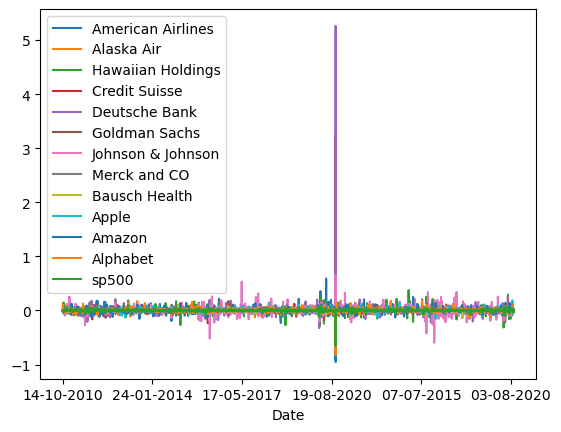

In [11]:
returns.plot()

In [12]:
# Average daily return from each stock
daily_returns_mean = returns.mean()
print(daily_returns_mean)

American Airlines    0.000612
Alaska Air           0.000706
Hawaiian Holdings    0.001262
Credit Suisse        0.000622
Deutsche Bank        0.001321
Goldman Sachs        0.000407
Johnson & Johnson    0.001155
Merck and CO         0.000553
Bausch Health        0.000569
Apple                0.001827
Amazon               0.002385
Alphabet             0.001276
sp500                0.000671
dtype: float64


In [13]:
# Define equal weights for each stock (for simplicity)
weights = np.array([1/13] * 13)
weights

array([0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
       0.07692308, 0.07692308, 0.07692308, 0.07692308, 0.07692308,
       0.07692308, 0.07692308, 0.07692308])

In [14]:
# Calculate portfolio daily returns
portfolio_daily_returns = returns.dot(weights)
portfolio_daily_returns

Date
14-10-2010   -0.005079
15-10-2010    0.011526
18-10-2010    0.013626
19-10-2010   -0.015065
20-10-2010    0.029617
                ...   
04-09-2020    0.002338
08-09-2020   -0.024898
09-09-2020    0.011497
10-09-2020   -0.012880
11-09-2020   -0.001461
Length: 2516, dtype: float64

In [15]:
# Calculate total return for the portfolio
total_return = (prices.iloc[-1] / prices.iloc[0] - 1).dot(weights)
total_return

nan

In [16]:
# Cumulative Return for an investor if he/she bought the stocks on 01-06-2016 (01st June 2016)
new = returns.loc["01-06-2016":, :]

# Cumulative return from the portfolio
cumulative_returns = (1+new).cumprod()
cumulative_returns.tail(5)

,American Airlines,Alaska Air,Hawaiian Holdings,Credit Suisse,Deutsche Bank,Goldman Sachs,Johnson & Johnson,Merck and CO,Bausch Health,Apple,Amazon,Alphabet,sp500
Date,,,,,,,,,,,,,
04-09-2020,1.0,1.0,0.333816,0.831050,0.586145,1.334472,0.653430,1.300797,1.575018,5.355767,4.589055,2.230503,1.660260
08-09-2020,1.0,1.0,0.336951,0.795282,0.566867,1.280951,0.647012,1.289153,1.539727,4.995351,4.387392,2.148281,1.614177
09-09-2020,1.0,1.0,0.326580,0.818874,0.567470,1.279307,0.648215,1.310514,1.568367,5.194598,4.552826,2.182726,1.646695
10-09-2020,1.0,1.0,0.332127,0.814307,0.563253,1.265325,0.627758,1.286089,1.544161,5.025017,4.422590,2.147762,1.617738
11-09-2020,1.0,1.0,0.338157,0.818874,0.557831,1.271082,0.617730,1.293706,1.560976,4.959044,4.340562,2.131920,1.618601


In [17]:
# Calculate risk (standard deviation) associated with the portfolio
portfolio_std_dev = portfolio_daily_returns.std()
portfolio_std_dev

0.01763740304703473

In [18]:
# Assume a risk-free rate (e.g., 0.05 for 5%)
risk_free_rate = 0.05 / 252  # Assuming daily risk-free rate
risk_free_rate

0.0001984126984126984

In [19]:
# Calculate Sharpe Ratio
sharpe_ratio = (daily_returns_mean - risk_free_rate) / portfolio_std_dev
sharpe_ratio

American Airlines    0.023440
Alaska Air           0.028796
Hawaiian Holdings    0.060281
Credit Suisse        0.024025
Deutsche Bank        0.063623
Goldman Sachs        0.011822
Johnson & Johnson    0.054249
Merck and CO         0.020118
Bausch Health        0.021033
Apple                0.092336
Amazon               0.123987
Alphabet             0.061085
sp500                0.026804
dtype: float64

In [20]:
# Plotting the series to understand the correlation
import seaborn as sns

Text(0.5, 1.0, 'Technology Sector')

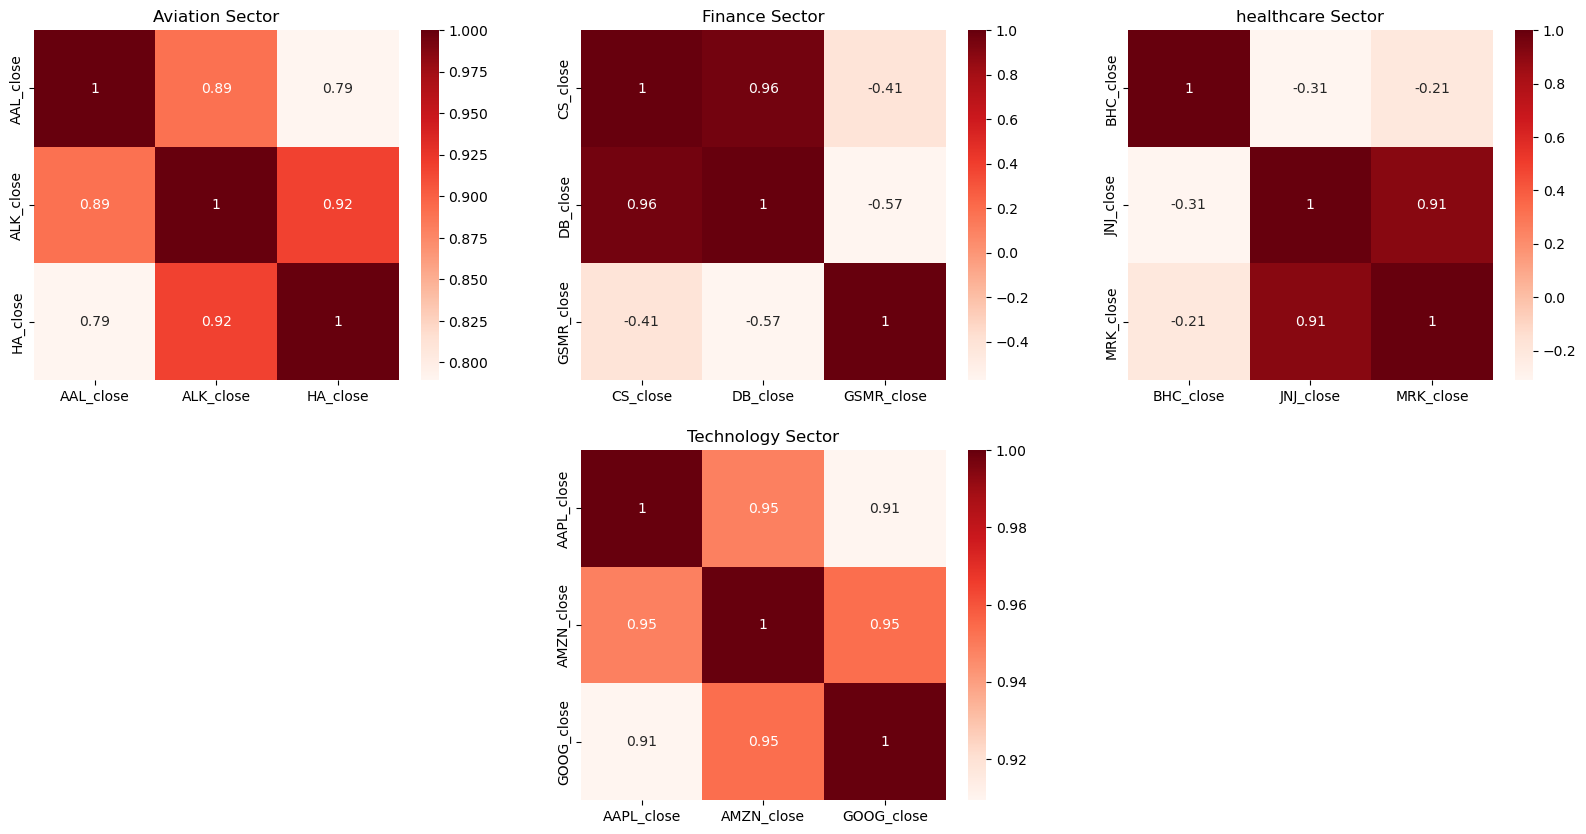

In [21]:
#Checking the correlation of stocks sector wise and finding the best stocks that have a positive corelation with Market SP500.
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
sns.heatmap(aviation.corr(), annot=True, cmap='Reds')
plt.title("Aviation Sector")

plt.subplot(2, 3, 2)
sns.heatmap(finance.corr(), annot=True, cmap='Reds')
plt.title("Finance Sector")

plt.subplot(2, 3, 3)
sns.heatmap(healthcare.corr(), annot=True, cmap='Reds')
plt.title("healthcare Sector")

plt.subplot(2, 3, 5)
sns.heatmap(technology.corr(), annot=True, cmap='Reds')
plt.title("Technology Sector")

In [22]:
# Normalising the dataset by dividing each row with the value of stock in first row. 
# This will help in proper comaprision between stocks.

normal_dataset= prices.div(prices.iloc[0])
normal_dataset.head()

,American Airlines,Alaska Air,Hawaiian Holdings,Credit Suisse,Deutsche Bank,Goldman Sachs,Johnson & Johnson,Merck and CO,Bausch Health,Apple,Amazon,Alphabet,sp500
Date,,,,,,,,,,,,,
13-10-2010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
14-10-2010,0.997959,0.996634,0.989045,0.991111,0.996188,0.979707,0.979541,1.002517,0.999731,1.007230,1.002320,0.995638,0.996359
15-10-2010,0.989796,0.991796,1.004695,0.974222,0.981979,0.973890,0.958722,0.999843,0.994349,1.048644,1.061030,1.107031,0.998379
18-10-2010,1.032653,1.001052,1.004695,1.001778,1.011956,0.993343,0.954415,1.004404,1.001884,1.059505,1.054070,1.136959,1.005611
19-10-2010,1.029592,0.977703,0.973396,0.987778,0.997401,1.012861,0.941852,0.995439,0.982777,1.031152,1.022556,1.118774,0.989644


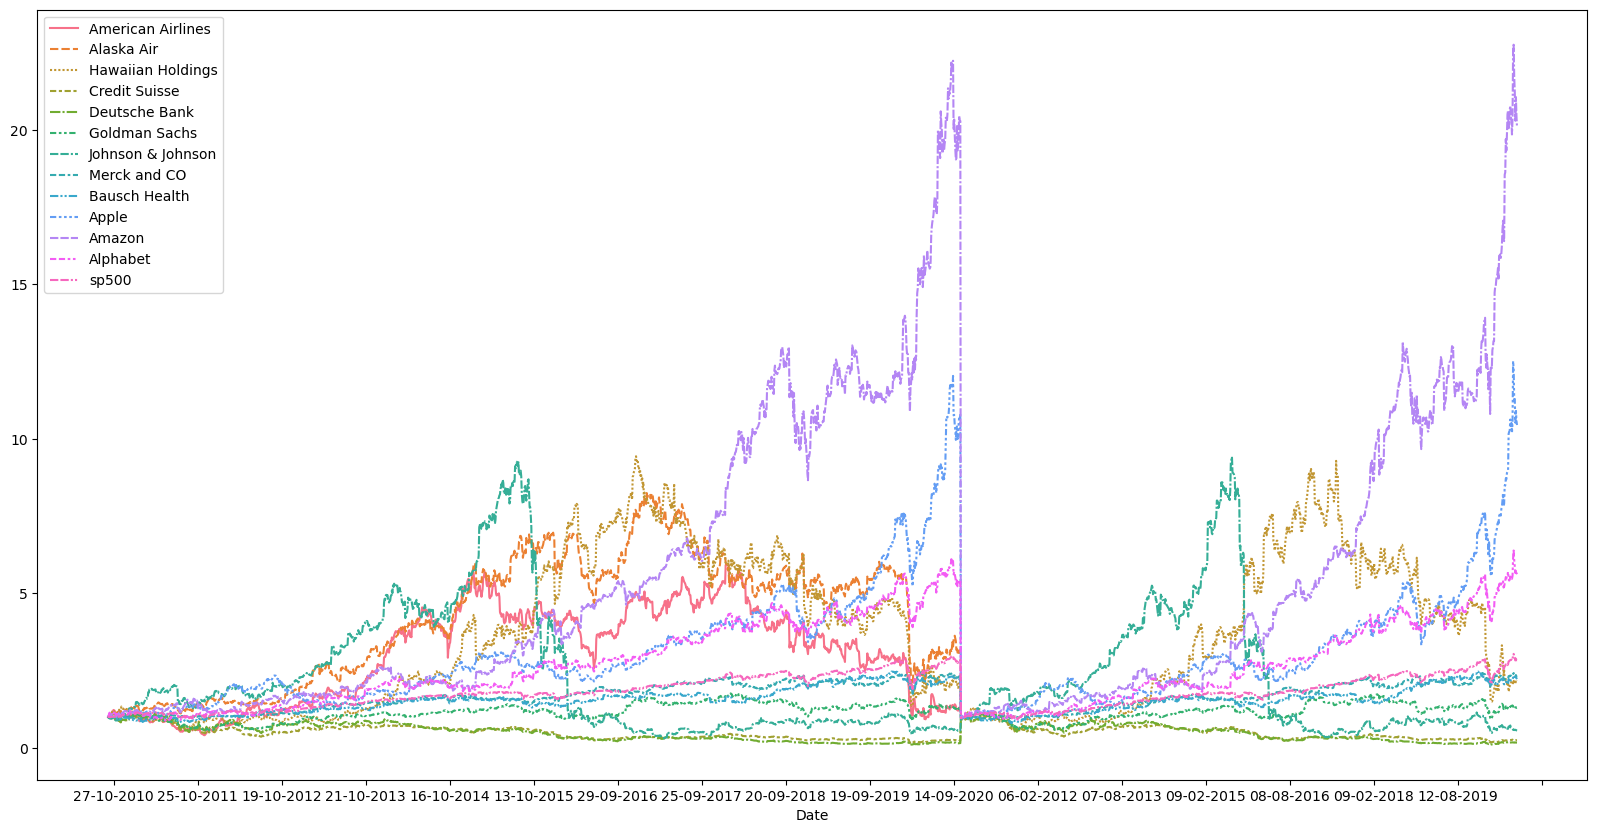

In [23]:
## comparison with SP500 Market and Listed Stocks

plt.figure(figsize=(20, 10))
sns.lineplot(data=normal_dataset)
plt.xticks(np.arange(10, 2600, step=150))
plt.show()

Text(0.5, 1.0, 'Technology Sector')

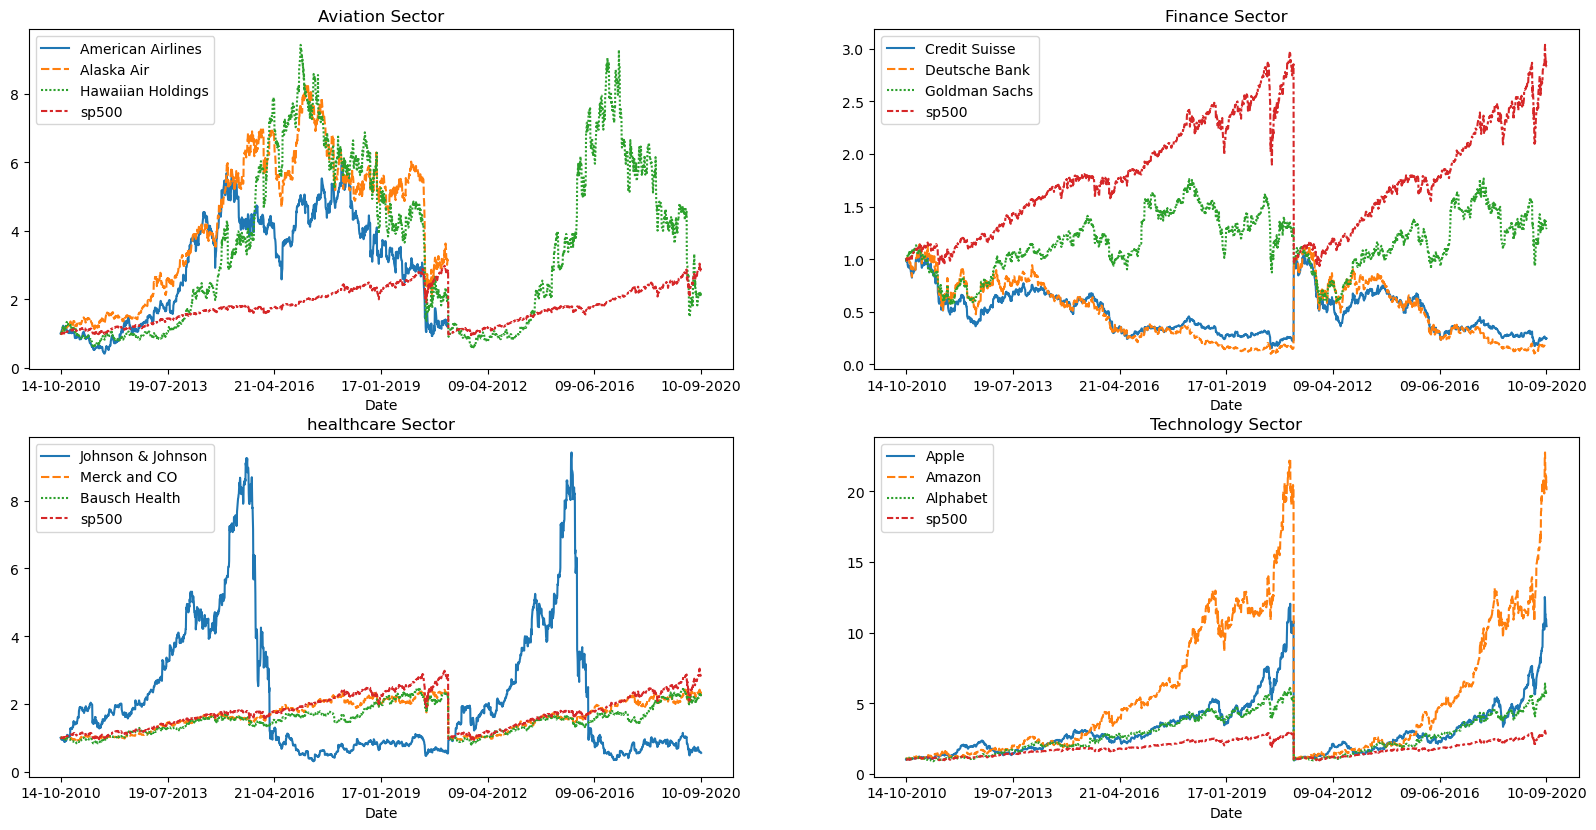

In [24]:
#Industry group or Sector Wise Comparision of Stocks
plt.figure(figsize=(20, 15))
plt.subplot(3, 2, 1)
sns.lineplot(data=normal_dataset[['American Airlines','Alaska Air','Hawaiian Holdings','sp500']])
plt.xticks(np.arange(1, 2518, step=419))
plt.title("Aviation Sector")

plt.subplot(3, 2, 2)
sns.lineplot(data=normal_dataset[['Credit Suisse','Deutsche Bank','Goldman Sachs','sp500']])
plt.xticks(np.arange(1, 2518, step=419))
plt.title("Finance Sector")

plt.subplot(3, 2, 3)
sns.lineplot(data=normal_dataset[['Johnson & Johnson','Merck and CO','Bausch Health','sp500']])
plt.xticks(np.arange(1, 2518, step=419))
plt.title("healthcare Sector")

plt.subplot(3, 2, 4)
sns.lineplot(data=normal_dataset[['Apple','Amazon','Alphabet','sp500']])
plt.xticks(np.arange(1, 2518, step=419))
plt.title("Technology Sector")

In [25]:
list1= returns.columns

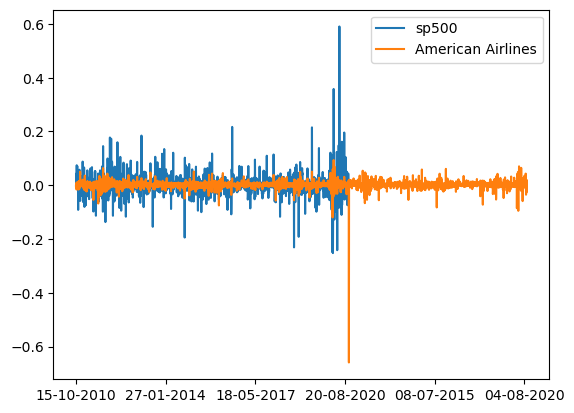

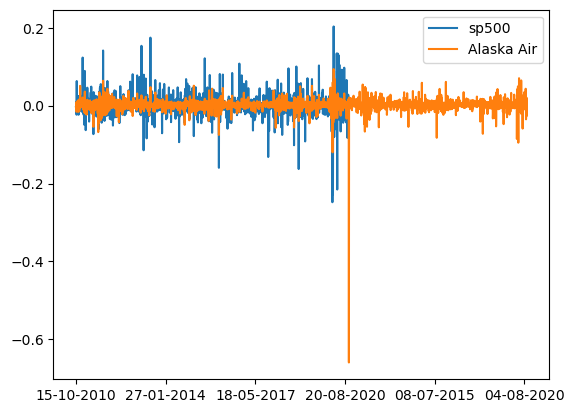

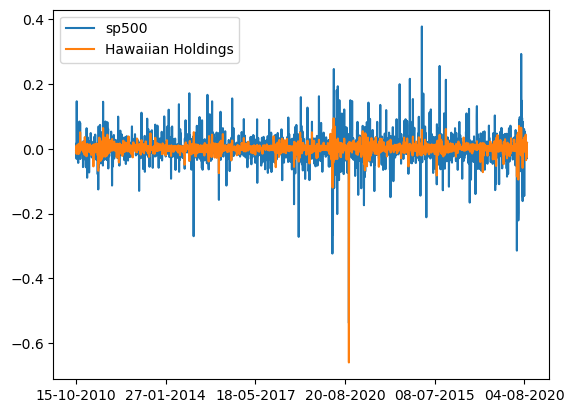

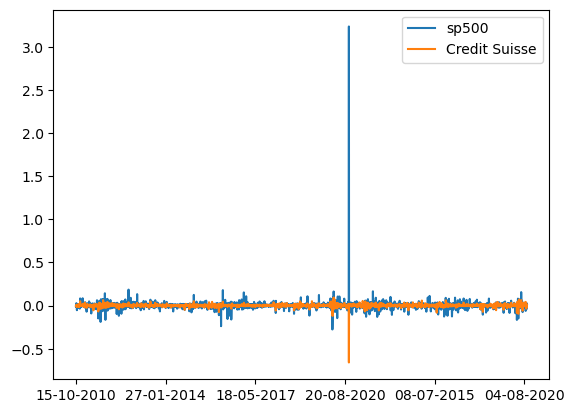

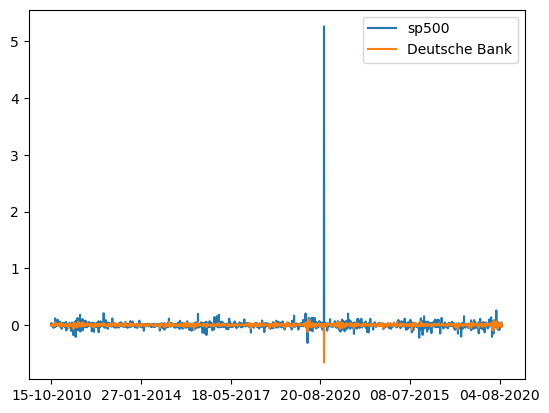

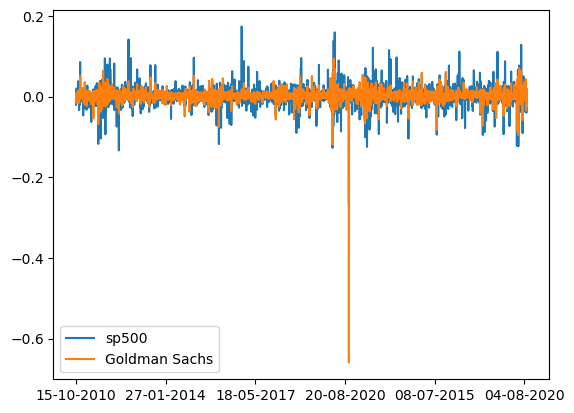

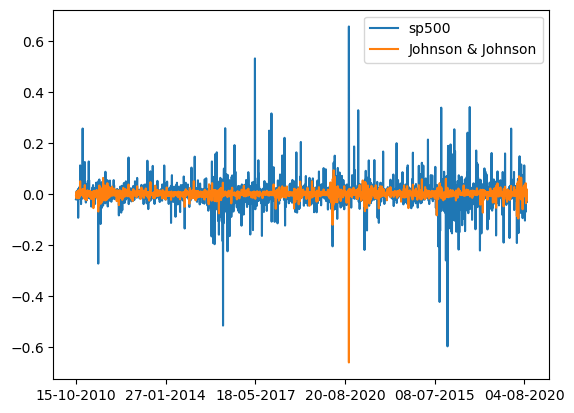

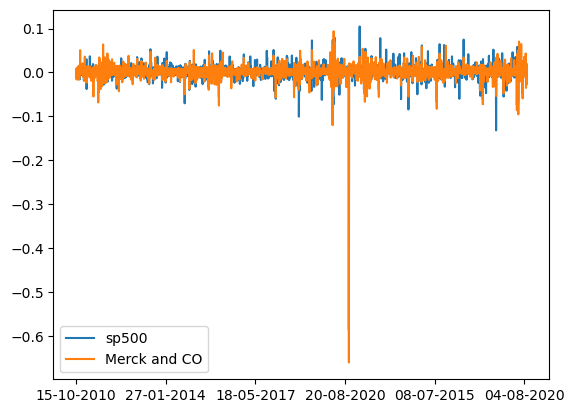

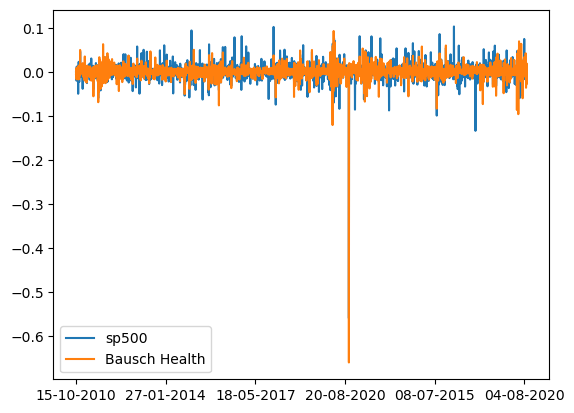

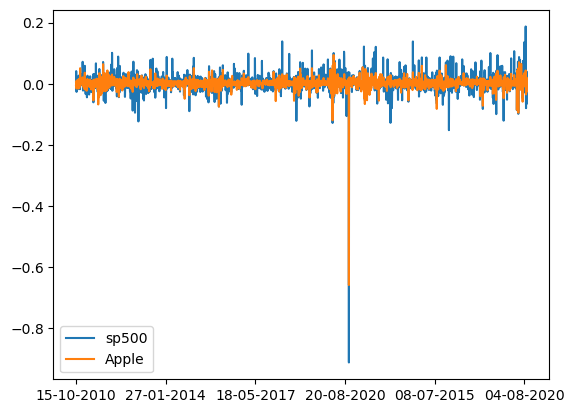

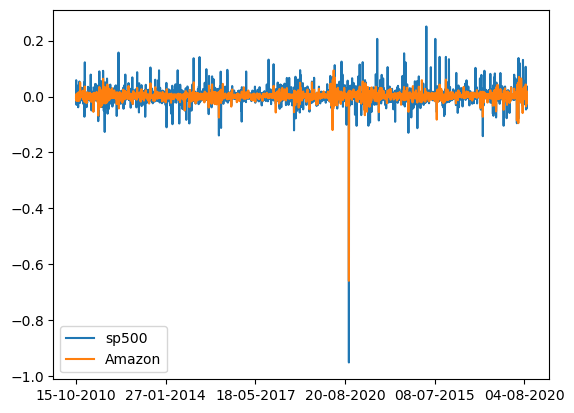

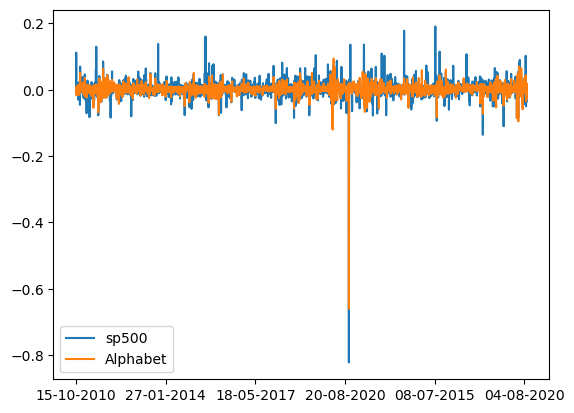

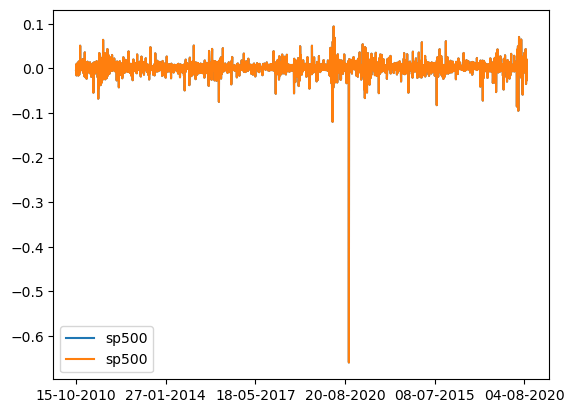

In [26]:
#Trend of volumes traded for each stock for last 10 years.
#This is showing the difference in volumes traded daily and the increase and decrease in same.
for i in list1:
    plt.plot(returns[[i,'sp500']])
    plt.legend(['sp500',i])
    plt.xticks(np.arange(1, 2518, step=500))
    plt.show()

In [27]:
risk_free_return = 0.75
market_return = ((returns['sp500'].mean())*252)*100
model = LinearRegression()
x_train = returns['sp500'].values.reshape(-1,1)
for i in list1:
    y_train = returns[i].values.reshape(-1,1)
    model.fit(x_train, y_train)
    print("                       ")
    print("******************######################******************")
    print("                       ",i)
    print("******************######################******************")
    print("Alpha: %.5f%%"%(model.intercept_*100))
    print("Beta: %.5f"%model.coef_)
    beta = model.coef_
    expected_return = risk_free_return + beta*(market_return-risk_free_return)
    print("risk_free_return : ",risk_free_return)
    print("Market_return : ",market_return)
    print("Expected Return: ", expected_return)
  

                       
******************######################******************
                        American Airlines
******************######################******************
Alpha: 0.03570%
Beta: 0.37970
risk_free_return :  0.75
Market_return :  16.913244543242424
Expected Return:  [[6.88725933]]
                       
******************######################******************
                        Alaska Air
******************######################******************
Alpha: 0.04757%
Beta: 0.34361
risk_free_return :  0.75
Market_return :  16.913244543242424
Expected Return:  [[6.30380595]]
                       
******************######################******************
                        Hawaiian Holdings
******************######################******************
Alpha: 0.05329%
Beta: 1.08581
risk_free_return :  0.75
Market_return :  16.913244543242424
Expected Return:  [[18.30026896]]
                       
******************######################******************

From the above comparision between Beta and Expected Returns of each stock.

Since Alexa is conservative and wants a stable returns, so target would be to select stocks that have Beta close to 1 
and have given consistent returns when compared to SP500 market returns.

We can select below stocks:

ALK,HA from Aviation, APPLE from Technology sector - These stocks are from 2 sectors Tech and Aviation. To diversify further we will choose.

Merck & Co and Bausch Health have positive alpha values, indicating that they are expected to perform slightly better than their respective risk-adjusted market benchmarks. They also have lower beta values, suggesting they are less volatile and may be more suitable for risk-averse investors.

Johnson & Johnson and Goldman Sachs have higher expected returns but also have negative alpha values, indicating underperformance relative to their risk-adjusted benchmarks. Additionally, their higher beta values suggest higher volatility, which might not be suitable for conservative investors

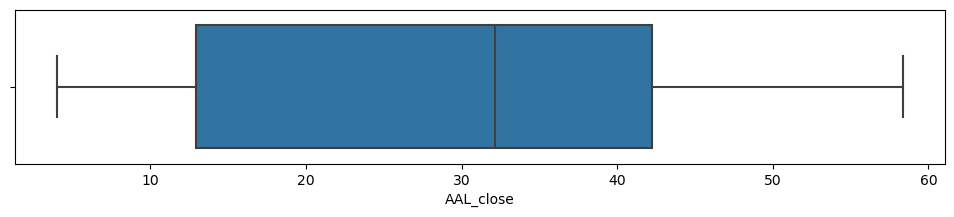

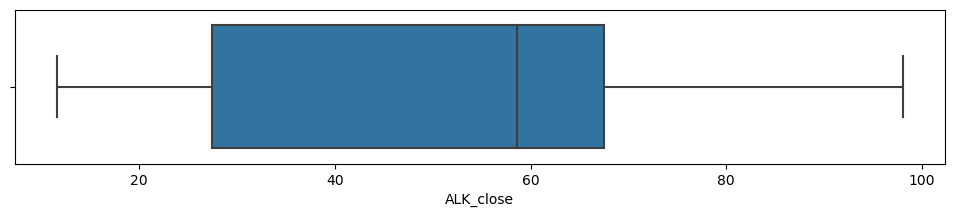

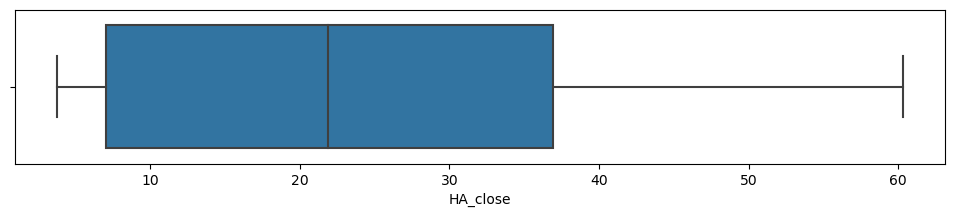

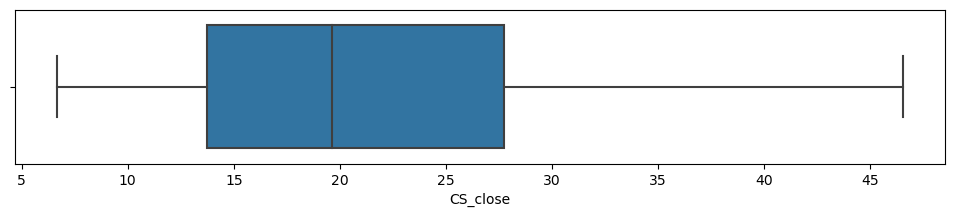

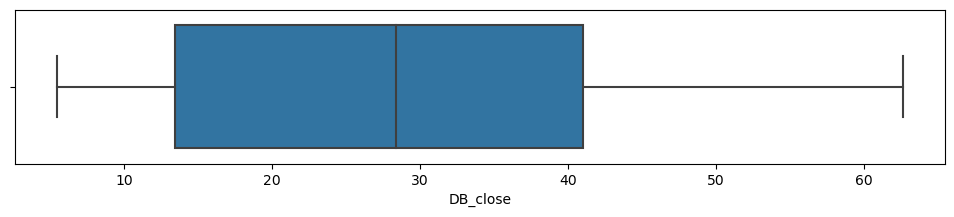

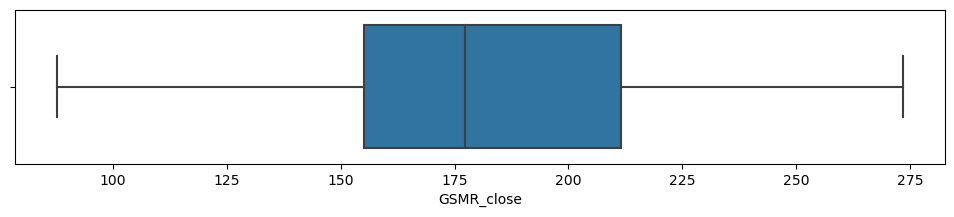

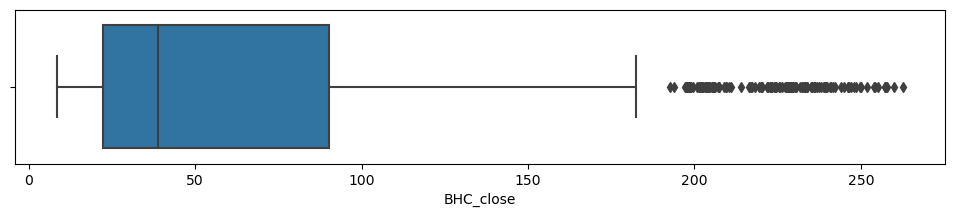

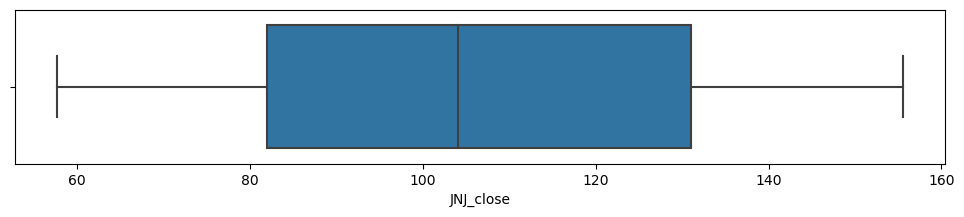

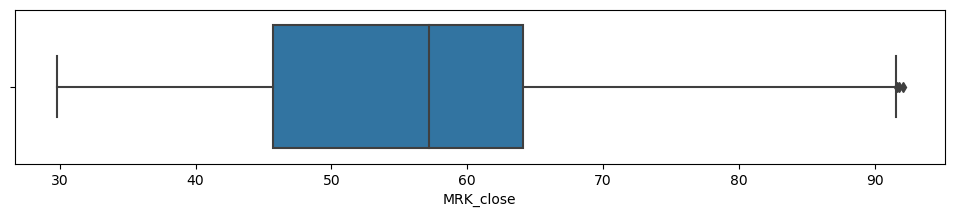

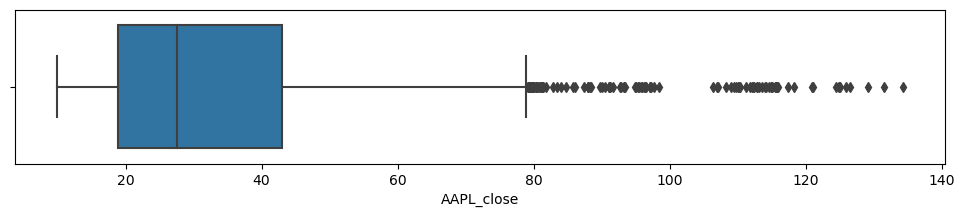

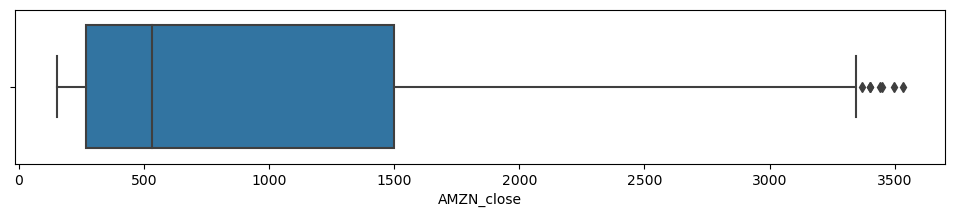

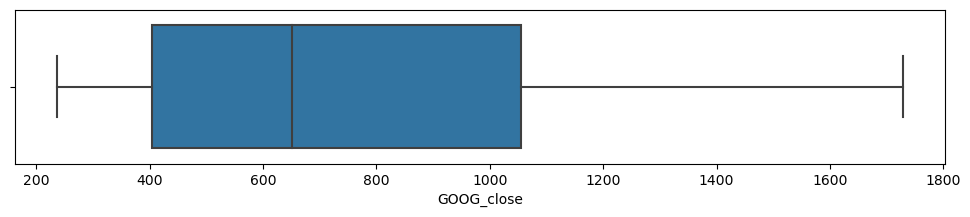

In [29]:
# Check for outliers
for col in AllStocks.columns:
    fig = plt.subplots(figsize=(12, 2))
    ax = sns.boxplot(x=AllStocks[col],whis=1.5)

In [30]:
# Replacing the outliers with the median value
for col in AllStocks.columns:
    Q1 = AllStocks[col].quantile(0.25)
    Q3 = AllStocks[col].quantile(0.75)
    IQR = Q3 - Q1
    
    col_median = AllStocks[col].median()
    
    # IQR
    AllStocks[col] = np.where(AllStocks[col] < (Q1 - 1.5 * IQR), col_median, AllStocks[col])
    AllStocks[col] = np.where(AllStocks[col] > (Q3 + 1.5 * IQR), col_median, AllStocks[col])

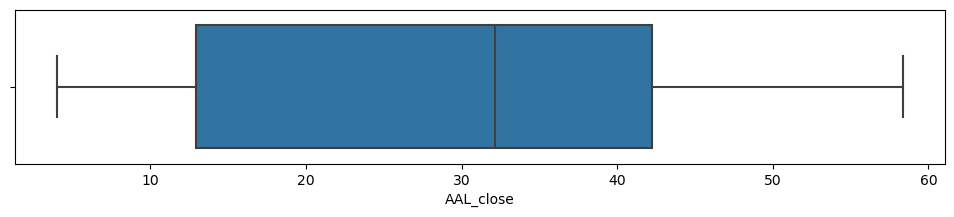

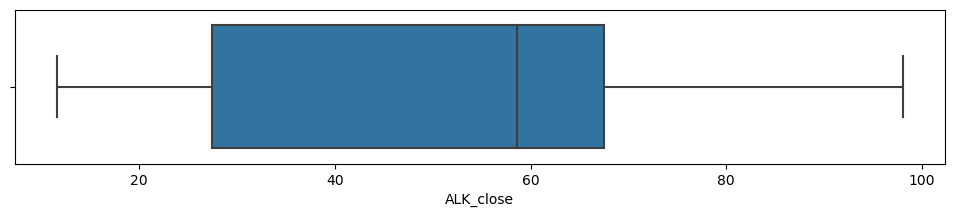

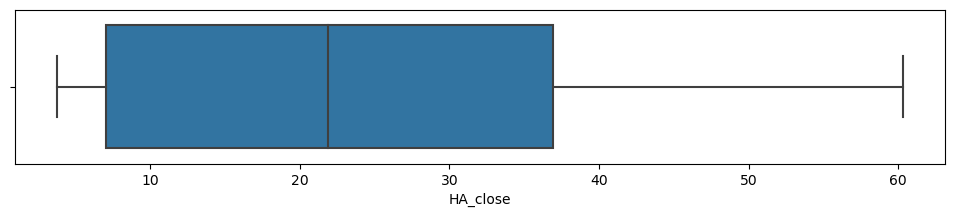

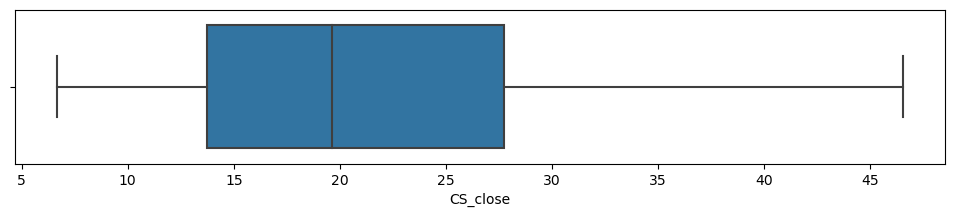

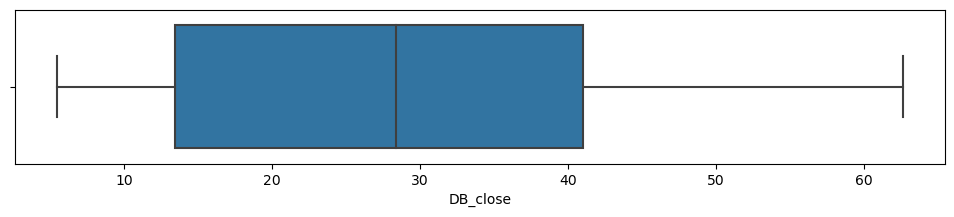

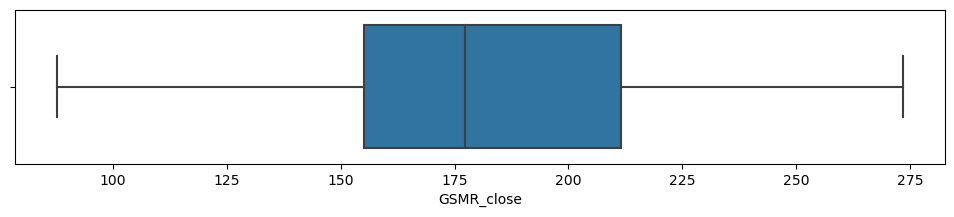

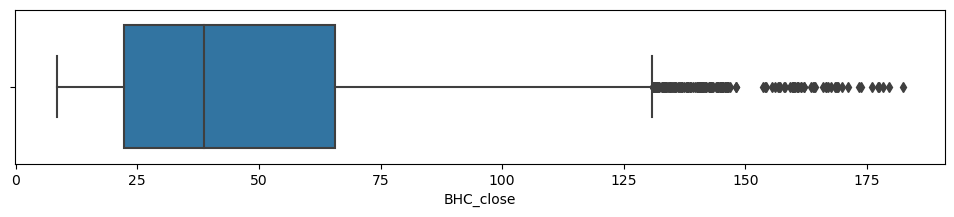

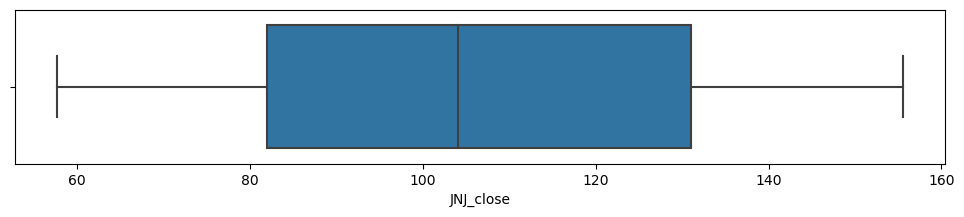

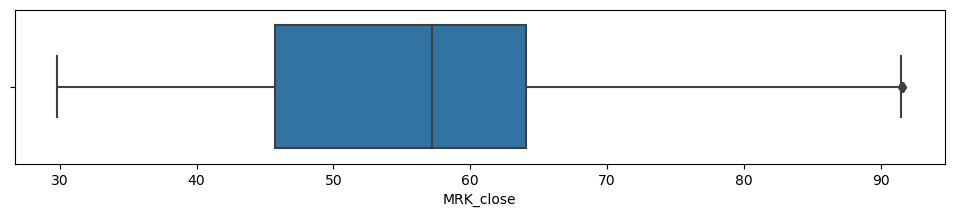

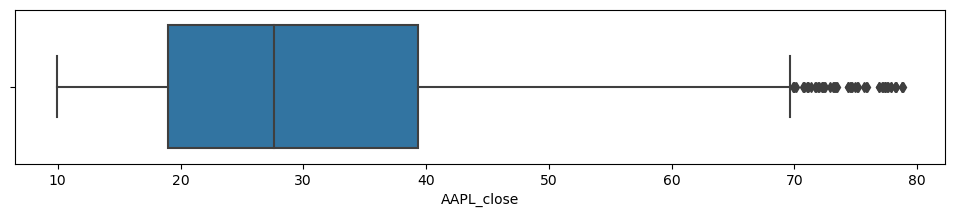

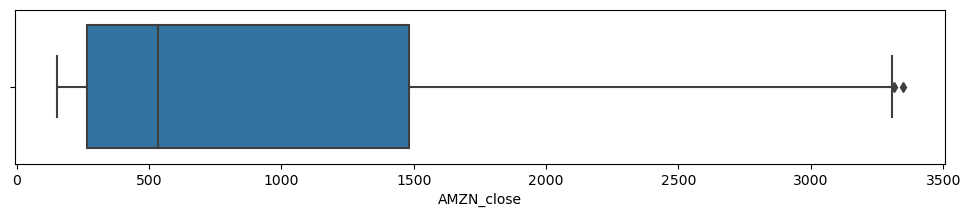

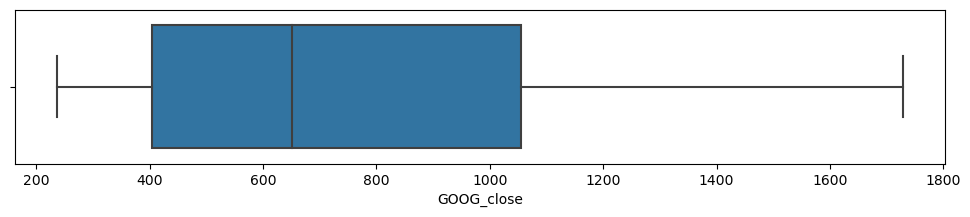

In [31]:
# Check for outliers
for col in AllStocks.columns:
    fig = plt.subplots(figsize=(12, 2))
    ax = sns.boxplot(x=AllStocks[col],whis=1.5)

In [32]:
#Normalising the dataset by dividing each row with the value of stock in first row. This will help in proper comaprision between stocks.
portfolio_sp500= AllStocks.div(AllStocks.iloc[0])
portfolio_sp500.head()

,AAL_close,ALK_close,HA_close,CS_close,DB_close,GSMR_close,BHC_close,JNJ_close,MRK_close,AAPL_close,AMZN_close,GOOG_close
Date,,,,,,,,,,,,
13-10-2010,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
14-10-2010,0.997959,0.996634,0.989045,0.991111,0.996188,0.979707,0.979541,1.002517,0.999731,1.007230,1.002320,0.995638
15-10-2010,0.989796,0.991796,1.004695,0.974222,0.981979,0.973890,0.958722,0.999843,0.994349,1.048644,1.061030,1.107031
18-10-2010,1.032653,1.001052,1.004695,1.001778,1.011956,0.993343,0.954415,1.004404,1.001884,1.059505,1.054070,1.136959
19-10-2010,1.029592,0.977703,0.973396,0.987778,0.997401,1.012861,0.941852,0.995439,0.982777,1.031152,1.022556,1.118774


<Axes: xlabel='Date'>

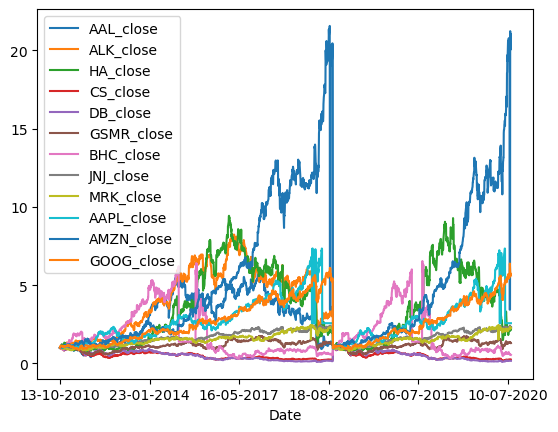

In [33]:
portfolio_sp500.plot()

In [34]:
# Calculating the daily returns
returns = AllStocks.pct_change(1)

# Dropping the rows with missing values
returns = returns.dropna(axis=0)
returns.head()

,AAL_close,ALK_close,HA_close,CS_close,DB_close,GSMR_close,BHC_close,JNJ_close,MRK_close,AAPL_close,AMZN_close,GOOG_close
Date,,,,,,,,,,,,
14-10-2010,-0.002041,-0.003366,-0.010955,-0.008889,-0.003812,-0.020293,-0.020459,0.002517,-0.000269,0.007230,0.002320,-0.004362
15-10-2010,-0.008180,-0.004854,0.015823,-0.017040,-0.014263,-0.005937,-0.021253,-0.002667,-0.005384,0.041117,0.058574,0.111881
18-10-2010,0.043299,0.009332,0.000000,0.028285,0.030528,0.019975,-0.004493,0.004562,0.007578,0.010358,-0.006560,0.027035
19-10-2010,-0.002964,-0.023324,-0.031153,-0.013975,-0.014384,0.019649,-0.013163,-0.008926,-0.019071,-0.026761,-0.029897,-0.015995
20-10-2010,0.074331,0.063038,0.146302,0.012823,0.026060,0.018377,0.012195,0.004898,0.012870,0.003360,0.000000,0.000247


In [35]:
# Average daily return from each stock
daily_returns_mean = returns.mean()
print(daily_returns_mean)

AAL_close     0.000612
ALK_close     0.000706
HA_close      0.001262
CS_close      0.000622
DB_close      0.001321
GSMR_close    0.000407
BHC_close     0.003237
JNJ_close     0.000553
MRK_close     0.000827
AAPL_close    0.003378
AMZN_close    0.005699
GOOG_close    0.001276
dtype: float64


In [36]:
# Define equal weights for each stock (for simplicity)
weights = np.array([1/12] * 12)
weights

array([0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
       0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
       0.08333333, 0.08333333])

In [37]:

# Total Portfolio Return = Weighted average of return from each stock
allocated_daily_returns = (weights * daily_returns_mean)
portfolio_return = np.sum(allocated_daily_returns)
print(portfolio_return)

0.0016582941304968616


In [38]:
print(round((portfolio_return*252)*100,2), "%")

41.79 %


In [39]:
returns['Portfolio_Daily_Return'] = returns.dot(weights)
returns.tail(5)

,AAL_close,ALK_close,HA_close,CS_close,DB_close,GSMR_close,BHC_close,JNJ_close,MRK_close,AAPL_close,AMZN_close,GOOG_close,Portfolio_Daily_Return
Date,,,,,,,,,,,,,
04-09-2020,0.0,0.0,0.019897,-0.003650,0.047363,0.016284,0.020038,-0.006419,-0.002924,0.0,5.172590,-0.030941,0.436020
08-09-2020,0.0,0.0,0.009393,-0.043040,-0.032888,-0.040106,-0.009822,-0.008951,-0.022407,0.0,-0.043944,-0.036863,-0.019052
09-09-2020,0.0,0.0,-0.030780,0.029665,0.001063,-0.001284,0.001860,0.016569,0.018601,0.0,0.037707,0.016034,0.007453
10-09-2020,0.0,0.0,0.016987,-0.005576,-0.007431,-0.010929,-0.031559,-0.018637,-0.015434,0.0,-0.028605,-0.016018,-0.009767
11-09-2020,0.0,0.0,0.018155,0.005607,-0.009626,0.004550,-0.015974,0.005922,0.010889,0.0,-0.018547,-0.007376,-0.000533


<Axes: xlabel='Date'>

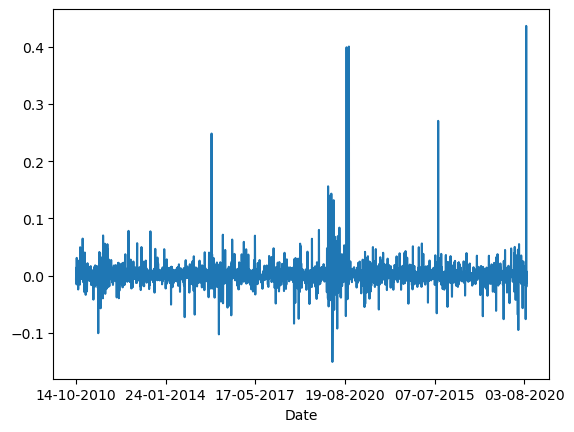

In [40]:
# Plot
returns['Portfolio_Daily_Return'].plot()

In [41]:
# Cumulative return from the portfolio
Cumulative_returns_daily = (1+returns).cumprod()
Cumulative_returns_daily.tail(5)

,AAL_close,ALK_close,HA_close,CS_close,DB_close,GSMR_close,BHC_close,JNJ_close,MRK_close,AAPL_close,AMZN_close,GOOG_close,Portfolio_Daily_Return
Date,,,,,,,,,,,,,
04-09-2020,1.254082,3.082036,2.165884,0.248491,0.176695,1.363278,0.584709,2.337056,2.293864,2.574099,21.232327,5.878902,34.226067
08-09-2020,1.254082,3.082036,2.186228,0.237796,0.170883,1.308602,0.578966,2.316137,2.242465,2.574099,20.299285,5.662190,33.573979
09-09-2020,1.254082,3.082036,2.118936,0.244850,0.171065,1.306922,0.580043,2.354514,2.284176,2.574099,21.064704,5.752976,33.824200
10-09-2020,1.254082,3.082036,2.154930,0.243484,0.169794,1.292639,0.561737,2.310632,2.248924,2.574099,20.462139,5.660822,33.493841
11-09-2020,1.254082,3.082036,2.194053,0.244850,0.168159,1.298520,0.552764,2.324316,2.273412,2.574099,20.082619,5.619069,33.475979


In [42]:
# Covariance matrix for the portfolio

# Removing the last column (Portfolio_Daily_Return) from our calculation.
covariance_portfolio = returns.iloc[:,:-1]
covariance_portfolio = (covariance_portfolio.cov())*252

covariance_portfolio

,AAL_close,ALK_close,HA_close,CS_close,DB_close,GSMR_close,BHC_close,JNJ_close,MRK_close,AAPL_close,AMZN_close,GOOG_close
AAL_close,0.272302,0.122061,0.144986,0.067789,0.080258,0.055486,0.043884,0.014306,0.012239,-0.004833,0.042365,0.029166
ALK_close,0.122061,0.128672,0.107576,0.057621,0.062433,0.045632,0.039953,0.016437,0.017047,0.009705,0.063544,0.028041
HA_close,0.144986,0.107576,0.456295,-0.084110,-0.177052,0.109584,0.018347,0.066786,0.067327,-0.011400,0.150181,0.093530
CS_close,0.067789,0.057621,-0.084110,1.279925,1.926784,0.035423,0.278990,-0.157542,-0.147848,-0.216717,-0.240913,-0.211419
DB_close,0.080258,0.062433,-0.177052,1.926784,3.104848,-0.002543,0.433218,-0.271593,-0.259873,-0.364759,-0.414625,-0.364902
GSMR_close,0.055486,0.045632,0.109584,0.035423,-0.002543,0.151132,0.034060,0.047321,0.045359,0.021467,0.079801,0.076978
BHC_close,0.043884,0.039953,0.018347,0.278990,0.433218,0.034060,3.181519,-0.010368,-0.010236,-0.070103,-0.051530,-0.025433
JNJ_close,0.014306,0.016437,0.066786,-0.157542,-0.271593,0.047321,-0.010368,0.084985,0.061543,0.050087,0.068473,0.075597
MRK_close,0.012239,0.017047,0.067327,-0.147848,-0.259873,0.045359,-0.010236,0.061543,0.245760,0.048727,0.065875,0.068148
AAPL_close,-0.004833,0.009705,-0.011400,-0.216717,-0.364759,0.021467,-0.070103,0.050087,0.048727,2.073227,0.089358,0.068394


In [43]:
portfolio_variance = np.dot(weights.T, np.dot(covariance_portfolio, weights))

In [44]:
# Standard deviation (risk of portfolio)
portfolio_risk = np.sqrt(portfolio_variance)
portfolio_risk

0.3806063843367248

In [45]:
# Assuming that the risk free rate is zero
Sharpe_Ratio = returns['Portfolio_Daily_Return'].mean()/ returns['Portfolio_Daily_Return'].std()
Sharpe_Ratio

0.06916490185847009

In [46]:
Annualised_Sharpe_Ratio = (252**0.5)*Sharpe_Ratio

print("ANNUALISED SHARPE RATIO FOR COMPLETE PORTFOLIO IS:")
print(round(Annualised_Sharpe_Ratio,2))


ANNUALISED SHARPE RATIO FOR COMPLETE PORTFOLIO IS:
1.1


In [47]:
Sharpe_Ratio_AAL = (returns['AAL_close'].mean()/ returns['AAL_close'].std())*(252**0.5)
Sharpe_Ratio_ALK = (returns['ALK_close'].mean()/ returns['ALK_close'].std())*(252**0.5)
Sharpe_Ratio_HA = (returns['HA_close'].mean()/ returns['HA_close'].std())*(252**0.5)
Sharpe_Ratio_CS = (returns['CS_close'].mean()/ returns['CS_close'].std())*(252**0.5)
Sharpe_Ratio_DB = (returns['DB_close'].mean()/ returns['DB_close'].std())*(252**0.5)
Sharpe_Ratio_GSMR = (returns['GSMR_close'].mean()/ returns['GSMR_close'].std())*(252**0.5)
Sharpe_Ratio_BHC = (returns['BHC_close'].mean()/ returns['BHC_close'].std())*(252**0.5)
Sharpe_Ratio_MRK = (returns['MRK_close'].mean()/ returns['MRK_close'].std())*(252**0.5)
Sharpe_Ratio_AAPL = (returns['AAPL_close'].mean()/ returns['AAPL_close'].std())*(252**0.5)
Sharpe_Ratio_AMZN= (returns['AMZN_close'].mean()/ returns['AMZN_close'].std())*(252**0.5)
Sharpe_Ratio_GOOG= (returns['GOOG_close'].mean()/ returns['GOOG_close'].std())*(252**0.5)

print("ANNUALISED SHARPE RATIOS FOR INDIVIDUAL STOCKS ARE:")

print("Sharpe_Ratio_AAL- ",round(Sharpe_Ratio_AAL,2))
print("Sharpe_Ratio_ALK- ",round(Sharpe_Ratio_ALK,2))
print("Sharpe_Ratio_HA- ",round(Sharpe_Ratio_HA,2))
print("Sharpe_Ratio_CS- ", round(Sharpe_Ratio_CS,2))
print("Sharpe_Ratio_DB- ", round(Sharpe_Ratio_DB,2))
print("Sharpe_Ratio_GSMR- ", round(Sharpe_Ratio_GSMR,2))
print("Sharpe_Ratio_BHC- ",round(Sharpe_Ratio_BHC,2))
print("Sharpe_Ratio_MRK- ",round(Sharpe_Ratio_MRK,2))
print("Sharpe_Ratio_AAPL- ", round(Sharpe_Ratio_AAPL,2))
print("Sharpe_Ratio_AMZN- ", round(Sharpe_Ratio_AMZN,2))
print("Sharpe_Ratio_GOOG- ",round(Sharpe_Ratio_GOOG,2))

ANNUALISED SHARPE RATIOS FOR INDIVIDUAL STOCKS ARE:
Sharpe_Ratio_AAL-  0.3
Sharpe_Ratio_ALK-  0.5
Sharpe_Ratio_HA-  0.47
Sharpe_Ratio_CS-  0.14
Sharpe_Ratio_DB-  0.19
Sharpe_Ratio_GSMR-  0.26
Sharpe_Ratio_BHC-  0.46
Sharpe_Ratio_MRK-  0.42
Sharpe_Ratio_AAPL-  0.59
Sharpe_Ratio_AMZN-  0.62
Sharpe_Ratio_GOOG-  0.75


### Train Test Split

In [48]:
# Keeping 70% values as train
train_len = int(AllStocks.shape[0]*0.7)
test_len = int(AllStocks.shape[0]) - int(AllStocks.shape[0]*0.7)

# Train data
train_data = AllStocks[:train_len] 

# Test data
test_data = AllStocks[train_len:]

In [49]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test to check for stationarity
# Creating a function for testing all the columns

from statsmodels.tsa.stattools import kpss
from statsmodels.tools.sm_exceptions import InterpolationWarning
# Assuming 'AllStocks' is your combined DataFrame with stock prices

# Drop rows with any NaN values
AllStocks_clean = AllStocks.dropna()

def kpss_test(series, **kw):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=InterpolationWarning)
        statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    return statistic, p_value, n_lags, critical_values

# Perform KPSS test for all columns in the DataFrame
for col in AllStocks_clean.columns:
    print(f'Performing KPSS test for: {col}')
    
    kpss_stat, p_value, n_lags, critical_values = kpss_test(AllStocks_clean[col], regression='c')
    
    print(f'KPSS Statistic: {kpss_stat}')
    print(f'Critical Values @ 0.05: {critical_values["5%"]}')
    print(f'p-value: {p_value}')
    
    if p_value <= 0.05:
        print("\nSeries is Stationary")
    else:
        print("\nSeries is Non-Stationary")
        
    print('\n--------------------------------------\n')
    
#All the series are stationary

Performing KPSS test for: AAL_close
KPSS Statistic: 2.492064414157096
Critical Values @ 0.05: 0.463
p-value: 0.01

Series is Stationary

--------------------------------------

Performing KPSS test for: ALK_close
KPSS Statistic: 3.5643926285975964
Critical Values @ 0.05: 0.463
p-value: 0.01

Series is Stationary

--------------------------------------

Performing KPSS test for: HA_close
KPSS Statistic: 3.3935434219194787
Critical Values @ 0.05: 0.463
p-value: 0.01

Series is Stationary

--------------------------------------

Performing KPSS test for: CS_close
KPSS Statistic: 4.3059534513662605
Critical Values @ 0.05: 0.463
p-value: 0.01

Series is Stationary

--------------------------------------

Performing KPSS test for: DB_close
KPSS Statistic: 5.393733051558263
Critical Values @ 0.05: 0.463
p-value: 0.01

Series is Stationary

--------------------------------------

Performing KPSS test for: GSMR_close
KPSS Statistic: 3.817202242022839
Critical Values @ 0.05: 0.463
p-value: 0.01


In [50]:
# Fitting the VAR model to the data
from statsmodels.tsa.api import VAR

# Check stationarity and differencing if necessary
def make_stationary(df):
    diffed_data = df.copy()
    for col in df.columns:
        p_value = kpss_test(df[col], regression='c')[1]
        if p_value <= 0.05:  # Series is stationary
            print(f"{col} is already stationary.")
        else:
            print(f"{col} is not stationary. Differencing...")
            diffed_data[col] = df[col].diff().dropna()
            p_value = kpss_test(diffed_data[col].dropna(), regression='c')[1]
            if p_value <= 0.05:
                print(f"{col} is now stationary after differencing.")
            else:
                print(f"{col} is still not stationary after differencing.")
    return diffed_data.dropna()

# Make the data stationary if necessary
stationary_data = make_stationary(AllStocks_clean)

# Split the data into training and testing sets
train_size = int(len(stationary_data) * 0.8)
train_data = stationary_data[:train_size]
test_data = stationary_data[train_size:]

# Fit the VAR model
model = VAR(train_data)
model_fitted = model.fit()

# Summary of the model
print(model_fitted.summary())

# Forecasting
lag_order = model_fitted.k_ar
forecast_input = train_data.values[-lag_order:]
forecast = model_fitted.forecast(y=forecast_input, steps=len(test_data))

# Convert forecast to DataFrame
forecast_df = pd.DataFrame(forecast, index=test_data.index, columns=test_data.columns)

# Print forecast
print(forecast_df)

AAL_close is already stationary.
ALK_close is already stationary.
HA_close is already stationary.
CS_close is already stationary.
DB_close is already stationary.
GSMR_close is already stationary.
BHC_close is already stationary.
JNJ_close is already stationary.
MRK_close is already stationary.
AAPL_close is already stationary.
AMZN_close is already stationary.
GOOG_close is already stationary.
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 16, Jul, 2024
Time:                     21:43:46
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                    11.3829
Nobs:                     1217.00    HQIC:                   10.9749
Log likelihood:          -27094.5    FPE:                    45644.0
AIC:                      10.7286    Det(Omega_mle):         40180.0
--------------------------------------------------------------------
Results for eq

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [51]:
# To select the lag order
x = model.select_order(maxlags=50)
x.summary()

,AIC,BIC,FPE,HQIC
0,57.15,57.21,6.630e+24,57.17
1,10.97*,11.64*,5.783e+04*,11.22*
2,11.09,12.39,6.524e+04,11.58
3,11.21,13.13,7.364e+04,11.93
4,11.30,13.85,8.103e+04,12.26
5,11.43,14.60,9.226e+04,12.63
6,11.46,15.26,9.487e+04,12.89
7,11.52,15.94,1.012e+05,13.19
8,11.65,16.69,1.149e+05,13.55
9,11.75,17.42,1.275e+05,13.89


In [52]:
# Providing maxlags as 1 (minimum AIC vaue)
results = model.fit(maxlags = 1, ic = 'aic')

In [53]:
# Printing the results - Evaluation parameters, lag coefficients, etc.
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 16, Jul, 2024
Time:                     21:43:49
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                    11.3829
Nobs:                     1217.00    HQIC:                   10.9749
Log likelihood:          -27094.5    FPE:                    45644.0
AIC:                      10.7286    Det(Omega_mle):         40180.0
--------------------------------------------------------------------
Results for equation AAL_close
                   coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------
const                -0.381970         0.452226           -0.845           0.398
L1.AAL_close          0.970961         0.008063          120.428           0.000
L1.ALK_close         -0.001675         0.005120         

In [54]:
# Forecasting using the VAR model
# Selecting the lag value from the above results
lag_order = 1

In [55]:
# Obtaining the forecast values
predicted = results.forecast(train_data.values[-lag_order:], test_len)
forecast = pd.DataFrame(predicted, index = AllStocks.index[train_len:], columns = AllStocks.columns)

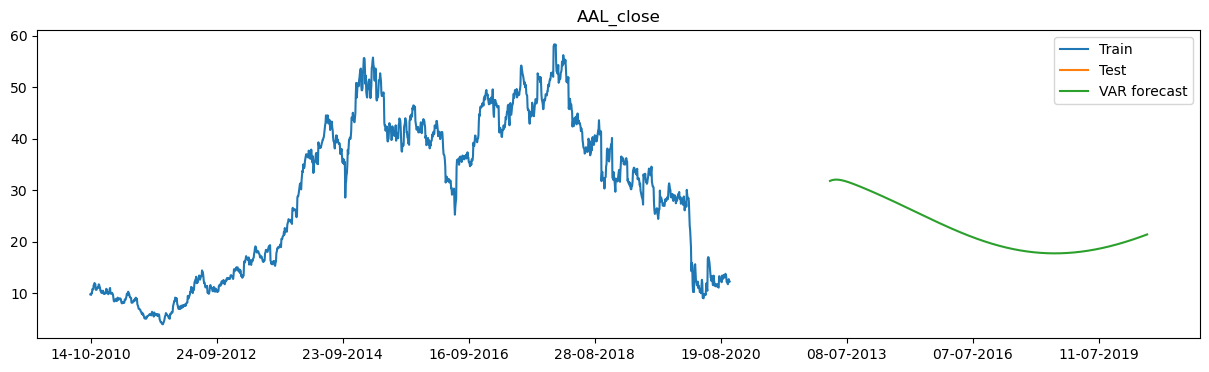

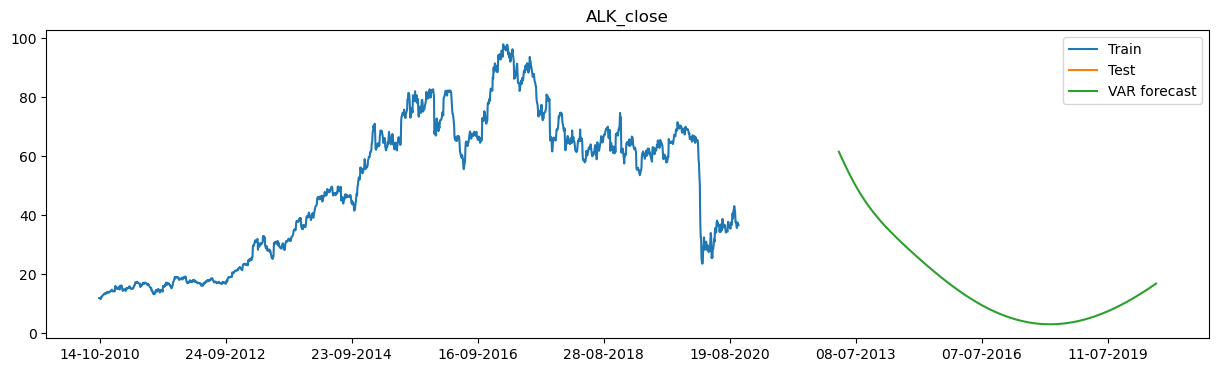

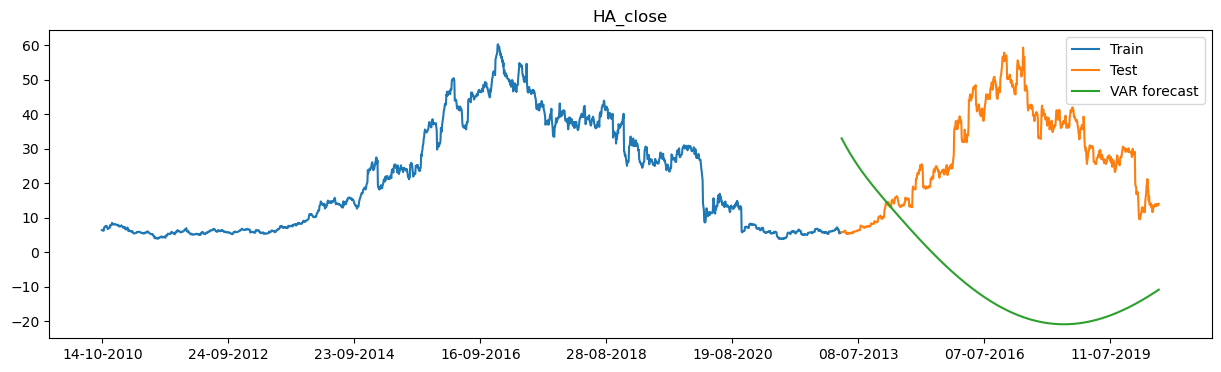

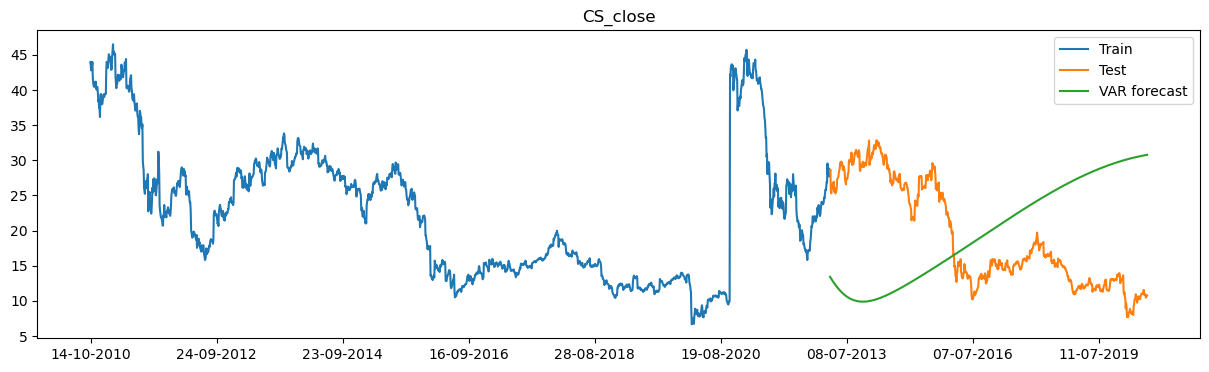

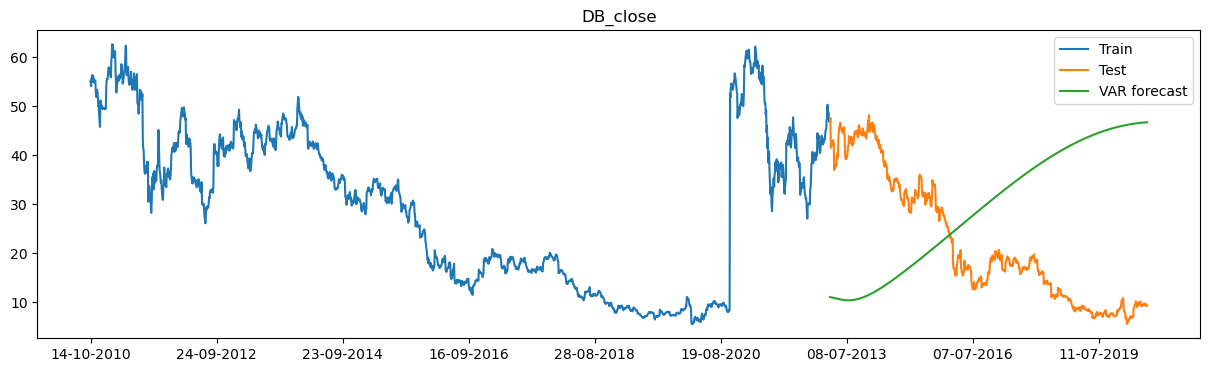

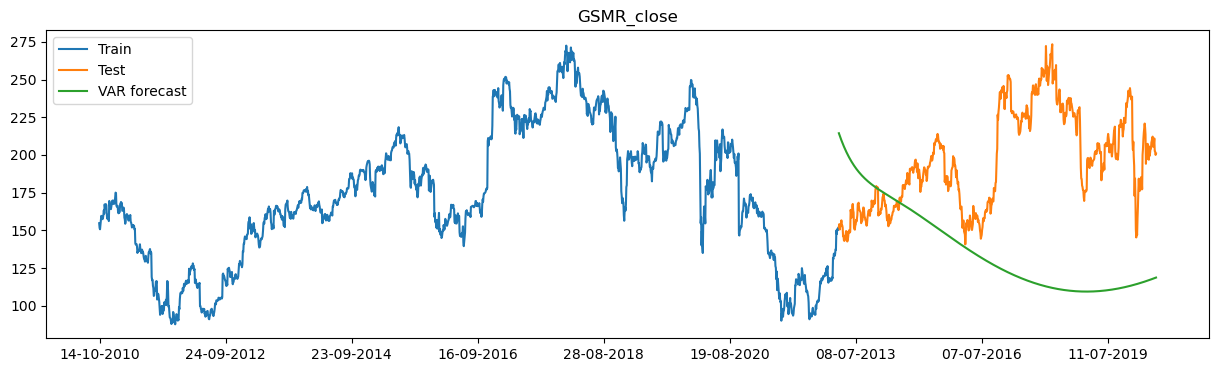

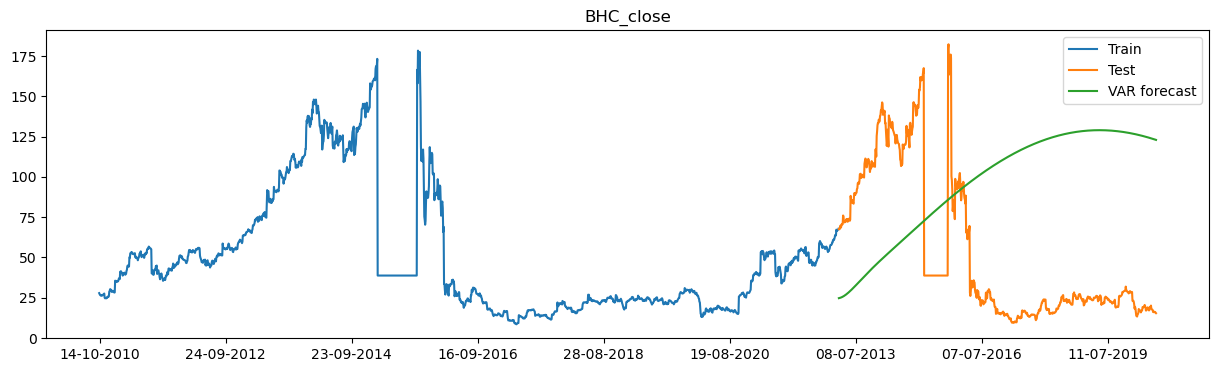

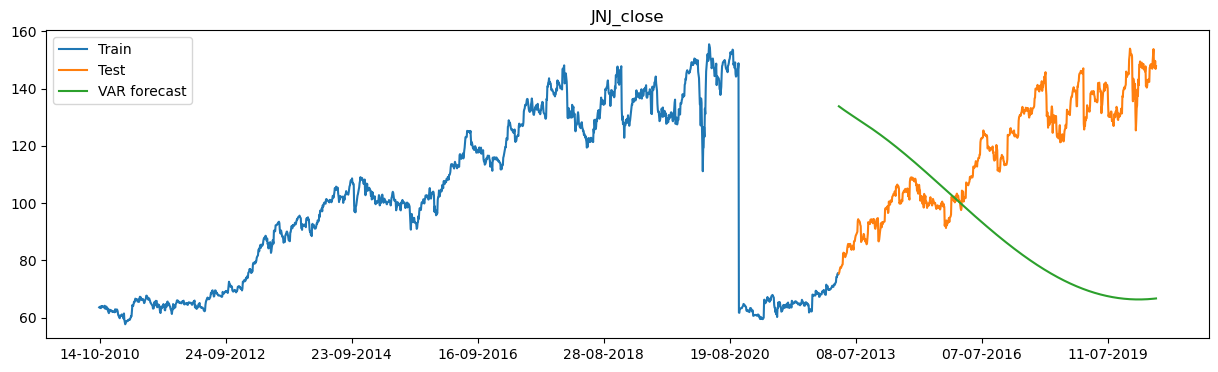

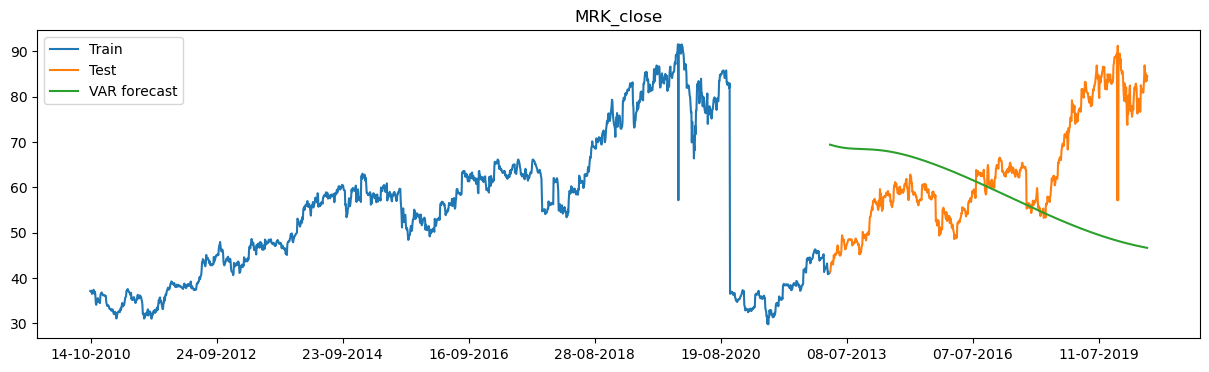

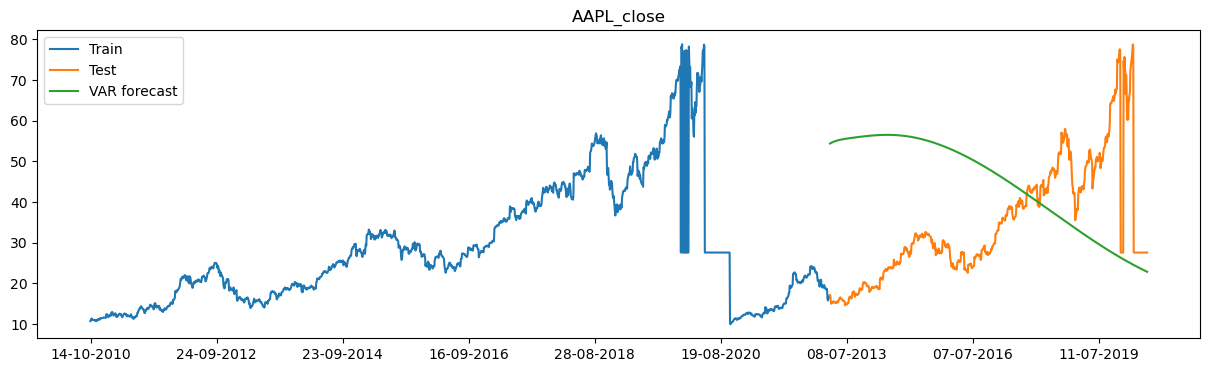

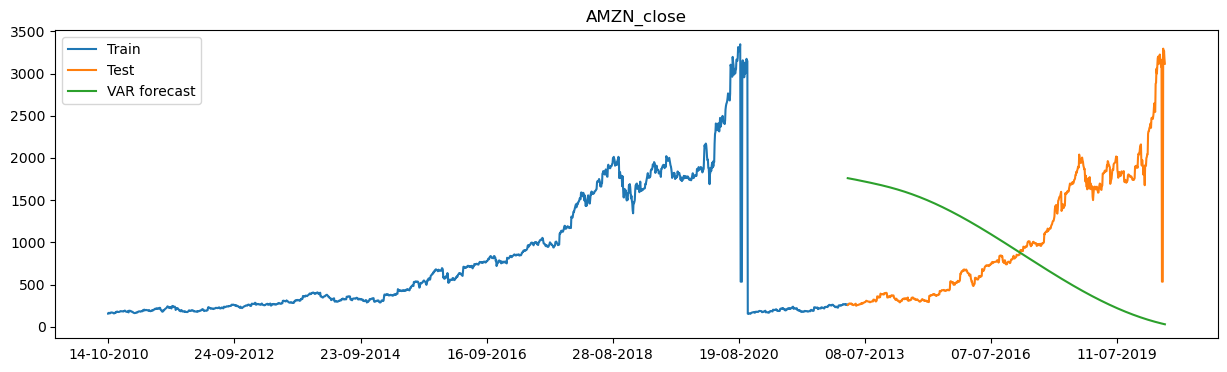

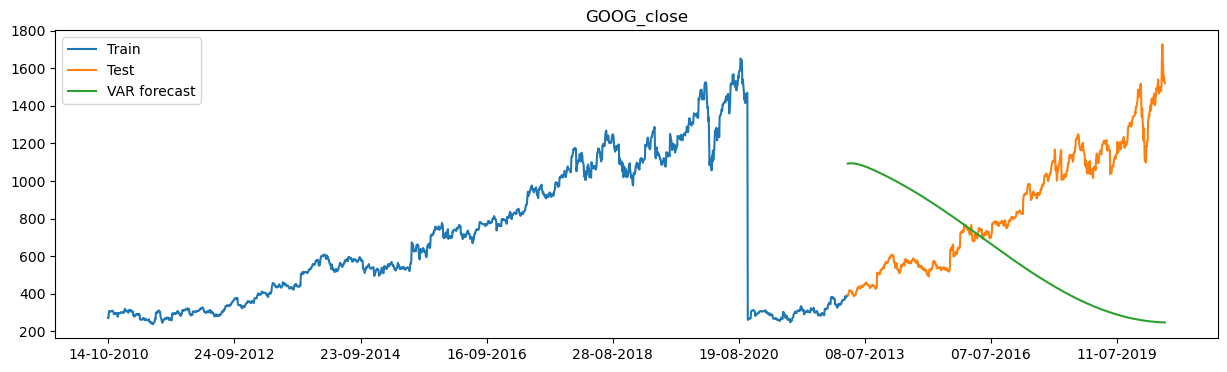

In [56]:
# Printing the train, test and forecasted values
for col in AllStocks.columns:
    plt.figure(figsize=(15,4))
    plt.plot(AllStocks[col][:train_len], label='Train')
    plt.plot(AllStocks[col][train_len:], label='Test')
    plt.plot(forecast[col][:], label='VAR forecast')
    plt.legend(loc='best')
    plt.xticks(np.arange(1, 2518, step=300))
    plt.title(col)
    plt.show()

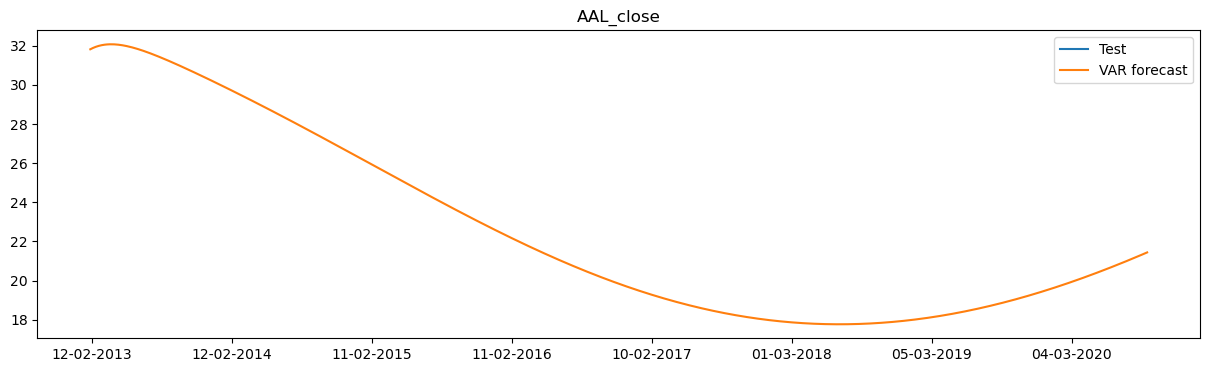

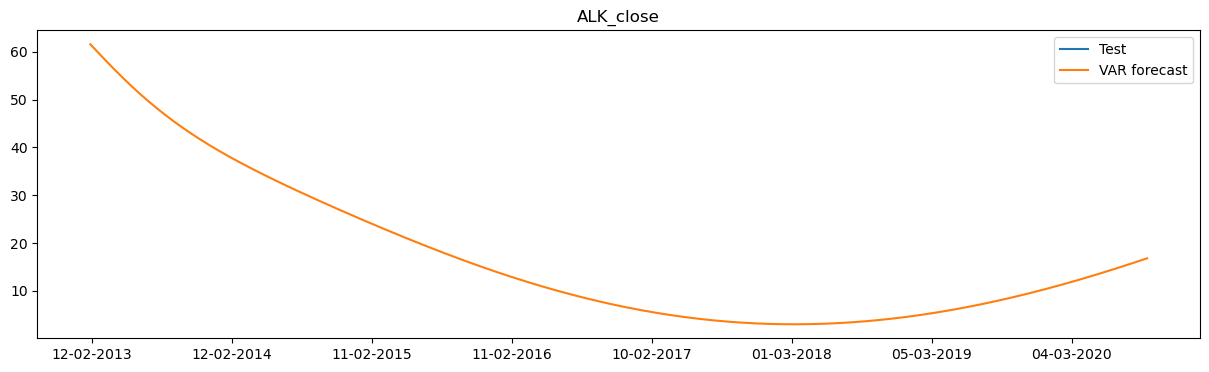

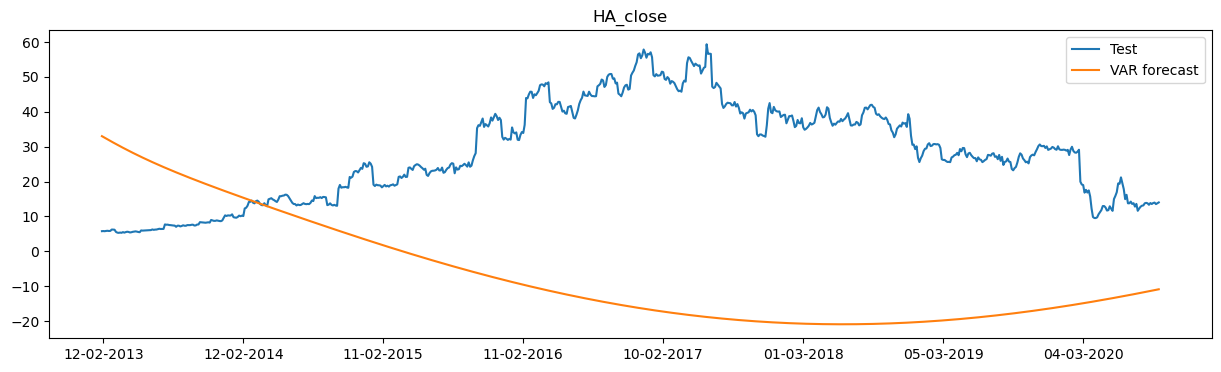

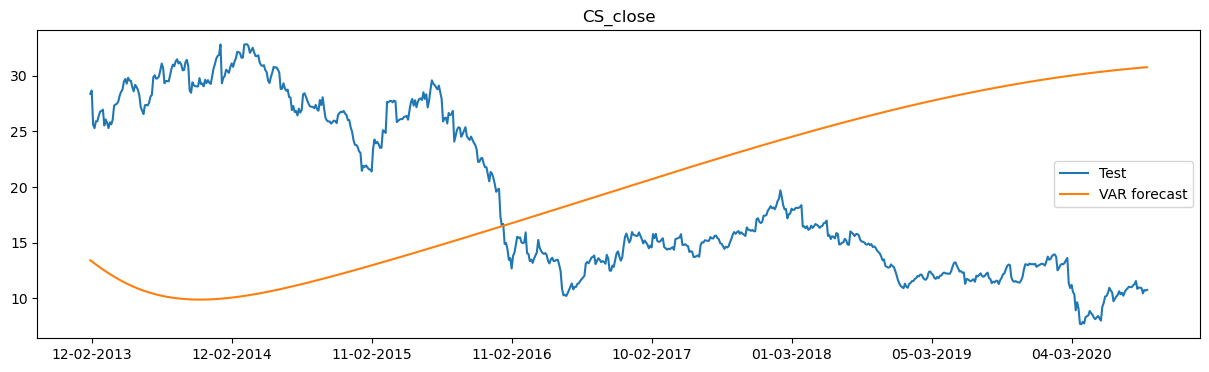

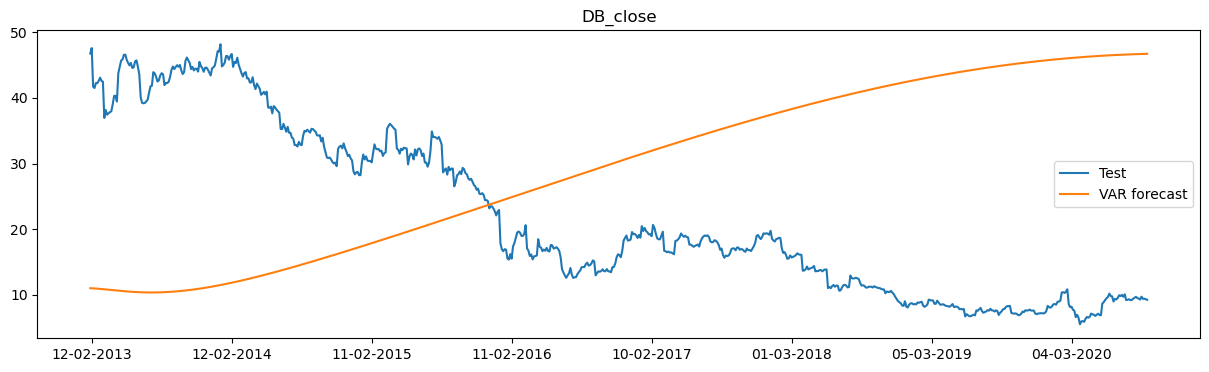

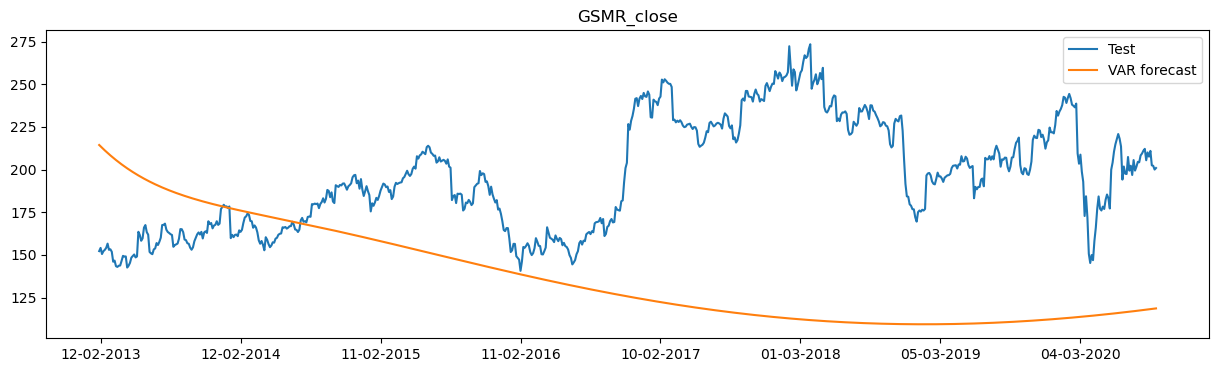

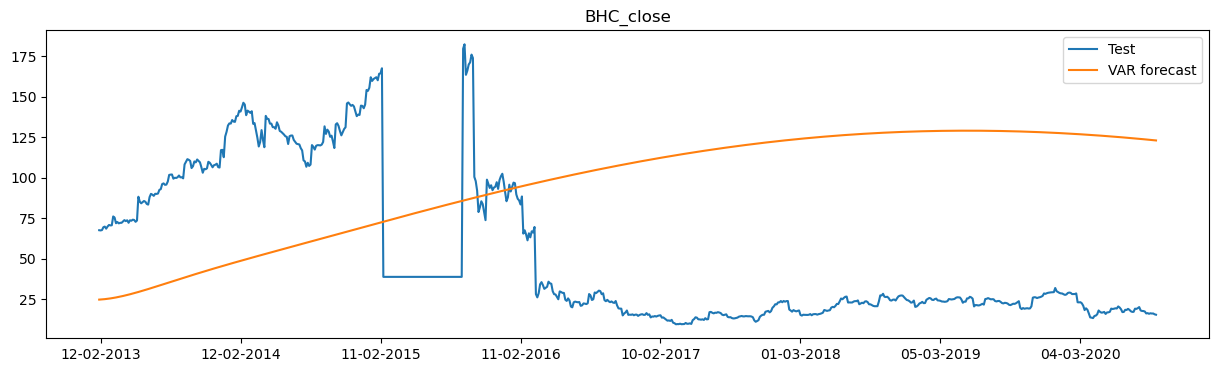

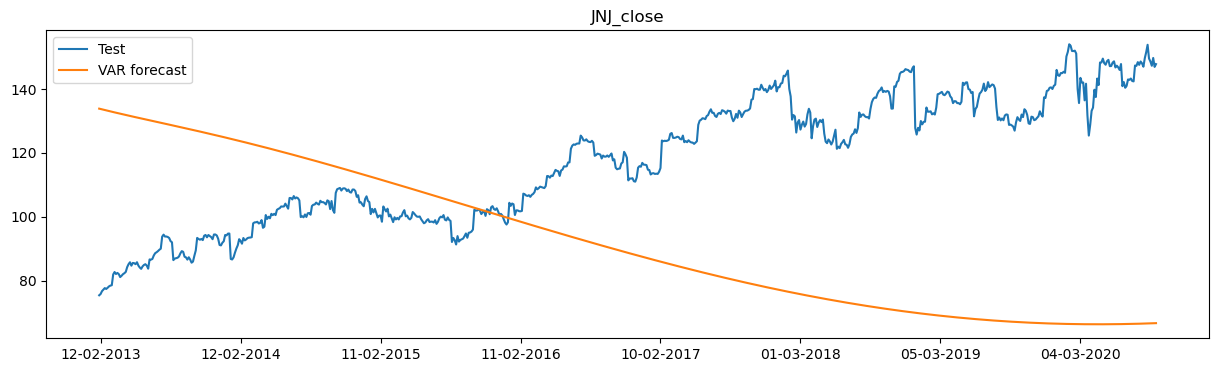

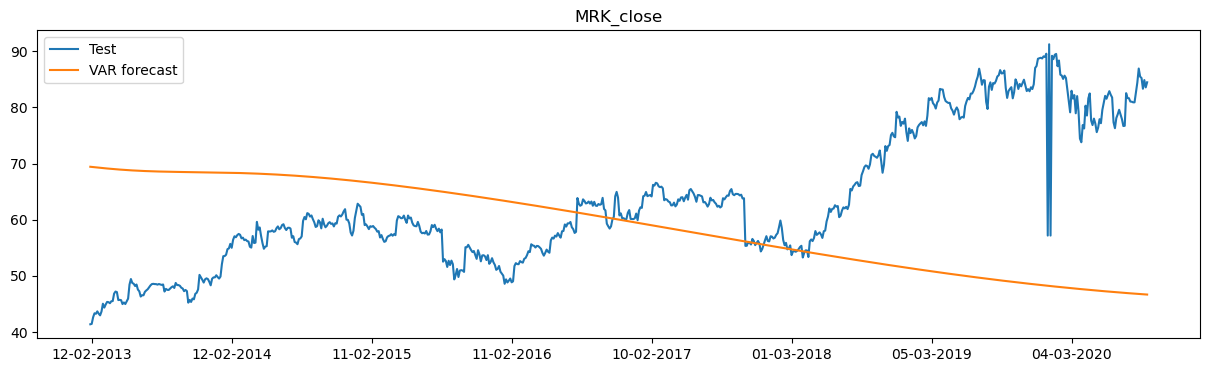

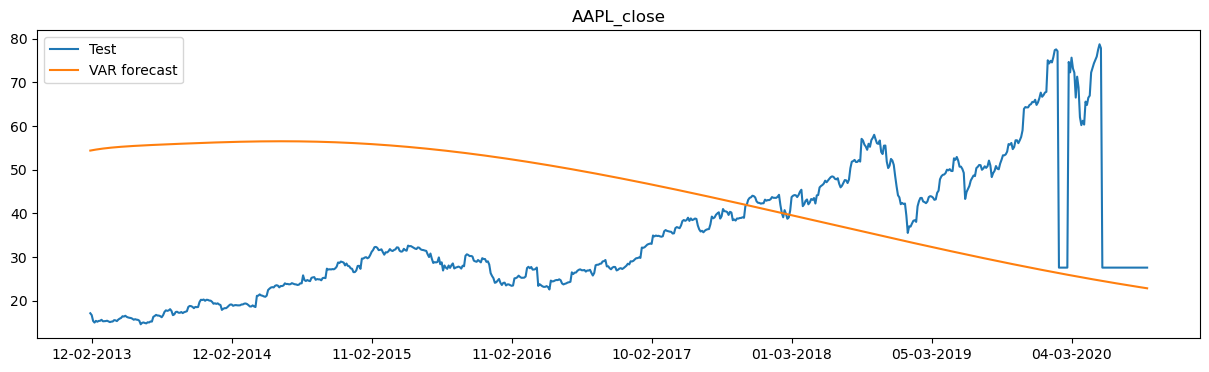

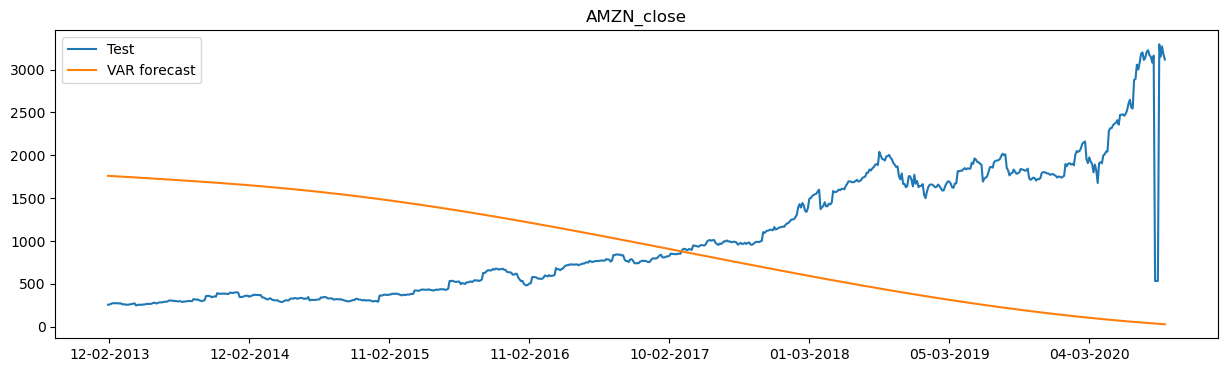

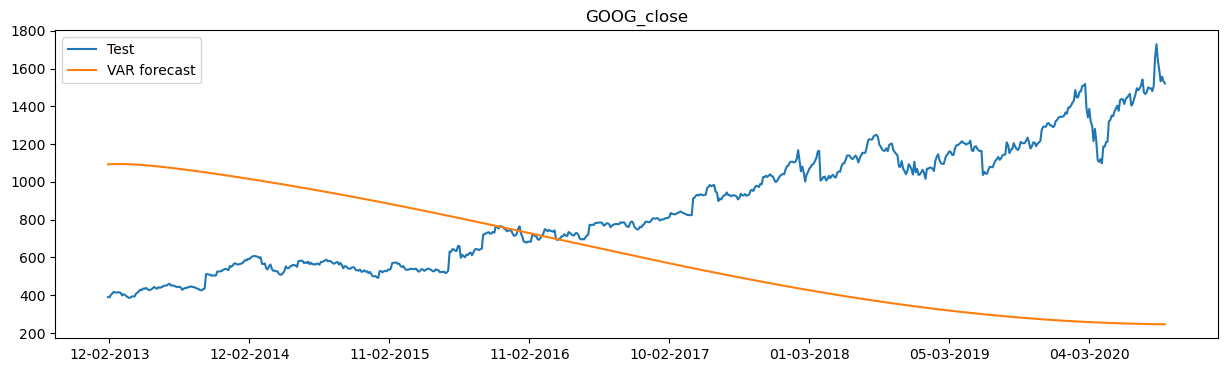

In [57]:
# Comparing the test and forecasted values
for col in AllStocks.columns:
    plt.figure(figsize=(15,4))
    plt.plot(AllStocks[col][train_len:], label='Test')
    plt.plot(forecast[col][:], label='VAR forecast')
    plt.legend(loc='best')
    plt.title(col)
    plt.xticks(np.arange(1, 800, step=100))
    plt.show()

In [58]:
# Model Evaluation
from sklearn.metrics import mean_squared_error

# Evaluate the model
eval_results = pd.DataFrame(columns=['Column', 'RMSE', 'MAPE'])

for col in AllStocks_clean.columns:
    # Align forecast and test data to ensure no NaN values
    actual = test_data[col].dropna()
    predicted = forecast_df[col].iloc[:len(actual)]
    
    # Calculate RMSE and MAPE
    rmse = np.sqrt(mean_squared_error(actual, predicted)).round(2)
    mape = np.round(np.mean(np.abs(actual - predicted) / actual) * 100, 2)
    
    # Store results
    tempResults = pd.DataFrame({'Column': [col], 'RMSE': [rmse], 'MAPE': [mape]})
    eval_results = pd.concat([eval_results, tempResults], ignore_index=True)

eval_results

,Column,RMSE,MAPE
0,AAL_close,6.77,34.03
1,ALK_close,25.38,41.26
2,HA_close,16.71,75.30
3,CS_close,3.34,25.41
4,DB_close,8.84,93.34
5,GSMR_close,43.97,17.81
6,BHC_close,44.60,192.62
7,JNJ_close,27.51,15.67
8,MRK_close,14.69,16.48
9,AAPL_close,16.22,36.88



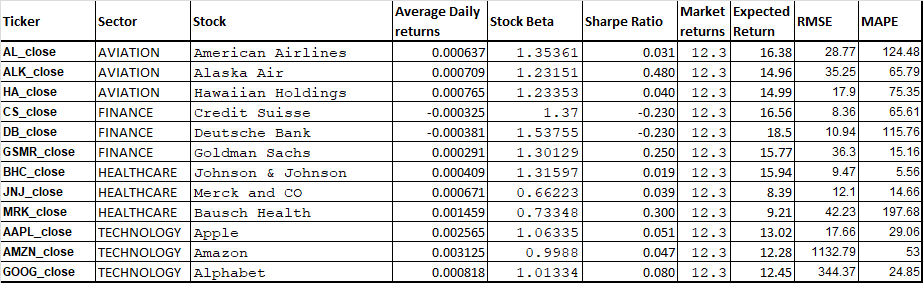


### Sharpe Ratio

Highest Sharpe Ratio: Deutsche Bank (1.53755) despite the negative expected return, suggesting high risk-adjusted returns.
Lowest Sharpe Ratio: Credit Suisse (-0.230) and Deutsche Bank (-0.230), indicating poor risk-adjusted returns.

### RMSE and MAPE

Lowest RMSE: Johnson & Johnson (9.47)
Highest RMSE: Amazon (1132.79)
Lowest MAPE: Johnson & Johnson (5.56)
Highest MAPE: Bausch Health (197.68)

### Expected Return

Highest Expected Return: Deutsche Bank (18.5%) despite the negative Sharpe ratio.
Lowest Expected Return: Merck and Co (8.39%)




### Analysis and Recommendations

#### Johnson & Johnson:

Pros: Low RMSE (9.47) and MAPE (5.56), indicating high forecast accuracy. Positive Sharpe ratio (0.019).
Cons: Moderate expected return (15.94%).

#### Alaska Air:

Pros: Decent expected return (14.96%) and moderate Sharpe ratio (0.480).
Cons: Relatively high RMSE (35.25) and moderate MAPE (65.79).

#### Merck and Co:

Pros: Low RMSE (12.1) and MAPE (14.66), good forecast accuracy. Positive Sharpe ratio (0.039).
Cons: Lowest expected return (8.39%).

#### Amazon:

Pros: Higher than average expected return (12.28%) but extremely high RMSE (1132.79) and MAPE (53), indicating very poor forecast accuracy.

### Best Stock Recommendation for the Portfolio
Based on the combined analysis of expected return, forecast accuracy (RMSE and MAPE), 
and risk-adjusted return (Sharpe ratio), Johnson & Johnson appears as a strong candidate. 
It has relatively good forecast accuracy with low RMSE and MAPE, a positive Sharpe ratio, 
and a decent expected return.

For a balanced portfolio approach considering risk and return, diversification across Johnson & Johnson, 
Alaska Air, and potentially Merck and Co could be considered, depending on your risk tolerance and investment goals.

For a diversified portfolio based on the Beta, RMSE, MAPE we can also include Apple stocks

** Suggested Portfolio stocks gives an average of 13.08 percent returns to Ms. Alexa.


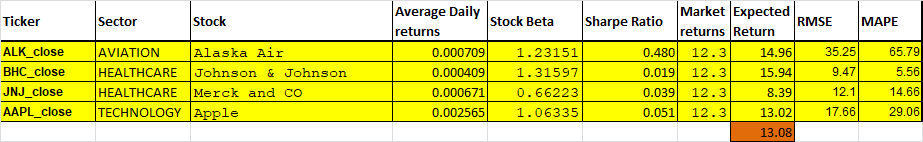